# <font size='6' color='darkorange' face='Courier New'>**Online Retail I**</font>
<hr style="color: grey; border-style: solid; border-width: 2px; font-weight: bold;">

<font size='5' face='Courier New'>**План выполнения проекта**</font>

- 1. Загрузка данных и изучение общей информации

- 2. Предобработка данных
  
  - 2.1 Изменение столбцов
  
  - 2.2 Проверка пропусков и отрицательных значений

  - 2.3 Проверка дубликатов
    
  - 2.4 Изменение типов данных

  - 2.5 Анализ данных на аномалии

- 3. Добавление дополнительных столбцов

- 4. Исследовательский и общий анализ данных

  - 4.1 Клиенты по максимальным и минимальным транзакциям
  - 4.2 Географический анализ
  - 4.3 Паттерны покупок
  - 4.4 Влияние сезонных и временных колебаний на продажи
  - 4.5 Тенденции потребительского рынка по странам
  - 4.6 Данные о поведении клиентов
  - 4.7 Финансовый анализ

- 5. Когортный анализ

  - 5.1 Когортный анализ по количеству уникальных клиентов
  - 5.2 Когортный анализ по средней сумме продаж
  - 5.3 Retention (Удержание всех клиентов)

- 6. RFM - Анализ

  - 6.1 Создание таблицы RFM
  - 6.2 Визуализация RFM

## 1.Загрузка данных и изучение общей информации

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('dark_background')

import missingno as msno

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# чтение файла с данными
df = pd.read_csv('Online_Retail_DataSet.csv', encoding = 'unicode_escape')

In [3]:
# получим общую информацию о данных
def Retail(df):
    try:
        display('Первые пять строк данных:')
        display(df.head(5))
        display('Случайные пять строк данных:')
        display(df.sample(5))
        display('Описание данных:')
        display(df.describe())
        display('Описание данных для категориальных переменных:')
        display(df.describe(include='object'))
        display('Общая информацию о датафрейме:')
        display(df.info())
        display('Графическое отображение количества пропусков:')
        display(pd.DataFrame(round(df.isna().mean()*100, 6)).style.background_gradient('binary'))
    except:
        return 'Проверьте параметры'

Retail(df)

'Первые пять строк данных:'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


'Случайные пять строк данных:'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
234993,557621,84279P,CHERRY BLOSSOM DECORATIVE FLASK,4,21-06-2011 14:00,3.75,12444.0,Norway
455131,575607,22905,CALENDAR IN SEASON DESIGN,2,10-11-2011 12:37,2.46,14096.0,United Kingdom
139508,548325,22090,PAPER BUNTING RETROSPOT,6,30-03-2011 13:01,2.95,13509.0,United Kingdom
129698,547387,22692,DOORMAT WELCOME TO OUR HOME,2,22-03-2011 16:00,7.95,12539.0,Spain
204739,554694,21929,JUMBO BAG PINK VINTAGE PAISLEY,2,25-05-2011 17:06,4.13,NaN,United Kingdom


'Описание данных:'

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


'Описание данных для категориальных переменных:'

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31-10-2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


'Общая информацию о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

'Графическое отображение количества пропусков:'

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [4]:
# определим количества уникальных значений для каждого столбца
df.nunique().to_frame(name = 'Количество уникальных значений')

,Количество уникальных значений
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 2.Предобработка данных

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

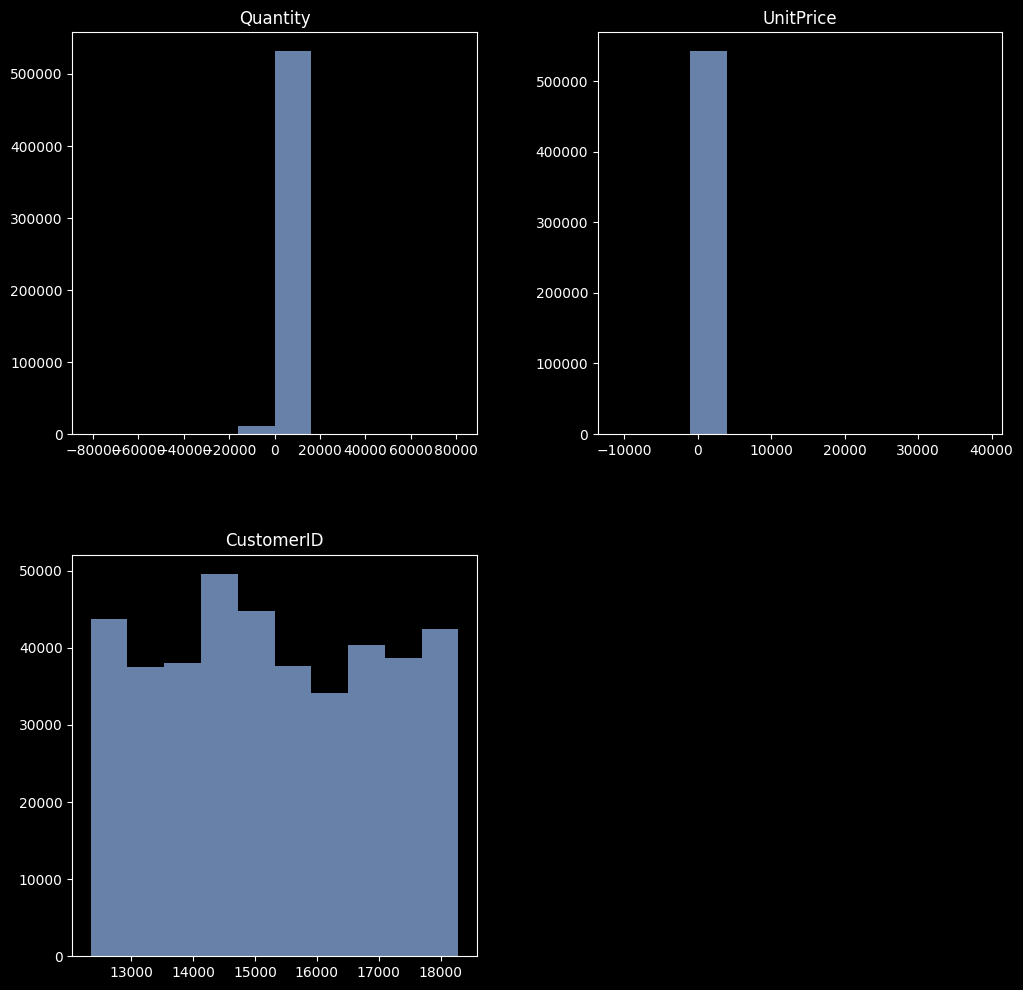

In [5]:
# посмотрим на гистрограмму
df.hist(figsize = (12, 12), color = '#6781a8', grid = False)

### 2.1 Изменение столбцов

Для удобства поменяем регистр и немного отредактируем название столбцов.

In [6]:
# Приведем название столбцов к нижнему регистру
df = df.rename(columns = str.lower)

In [7]:
# Переименуем название колонок, добавим нижнее
df.rename(index = str, columns={'invoiceno': 'invoice_no',
                              'stockcode' : 'stock_code',
                              'invoicedate' : 'invoice_date',
                              'unitprice' : 'unit_price',
                              'customerid' : 'cust_id'}, inplace=True)

In [8]:
# Приведем содержание столбца к нижнему регистру
df['description'] = df.description.str.lower()

In [9]:
df.sample(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
285847,561926,23111,parisienne sewing box,3,01-08-2011 12:48,12.5,12749.0,United Kingdom


### 2.2 Проверка пропусков и отрицательных значений

Определим частоту расположения пропущенных значений в датасете при помощи библиотеки Missingno.

Нам известно отсутствующие значения в  (%) из п.1:
- description: 0.268311
- cust_id: 24.926694

<Axes: >

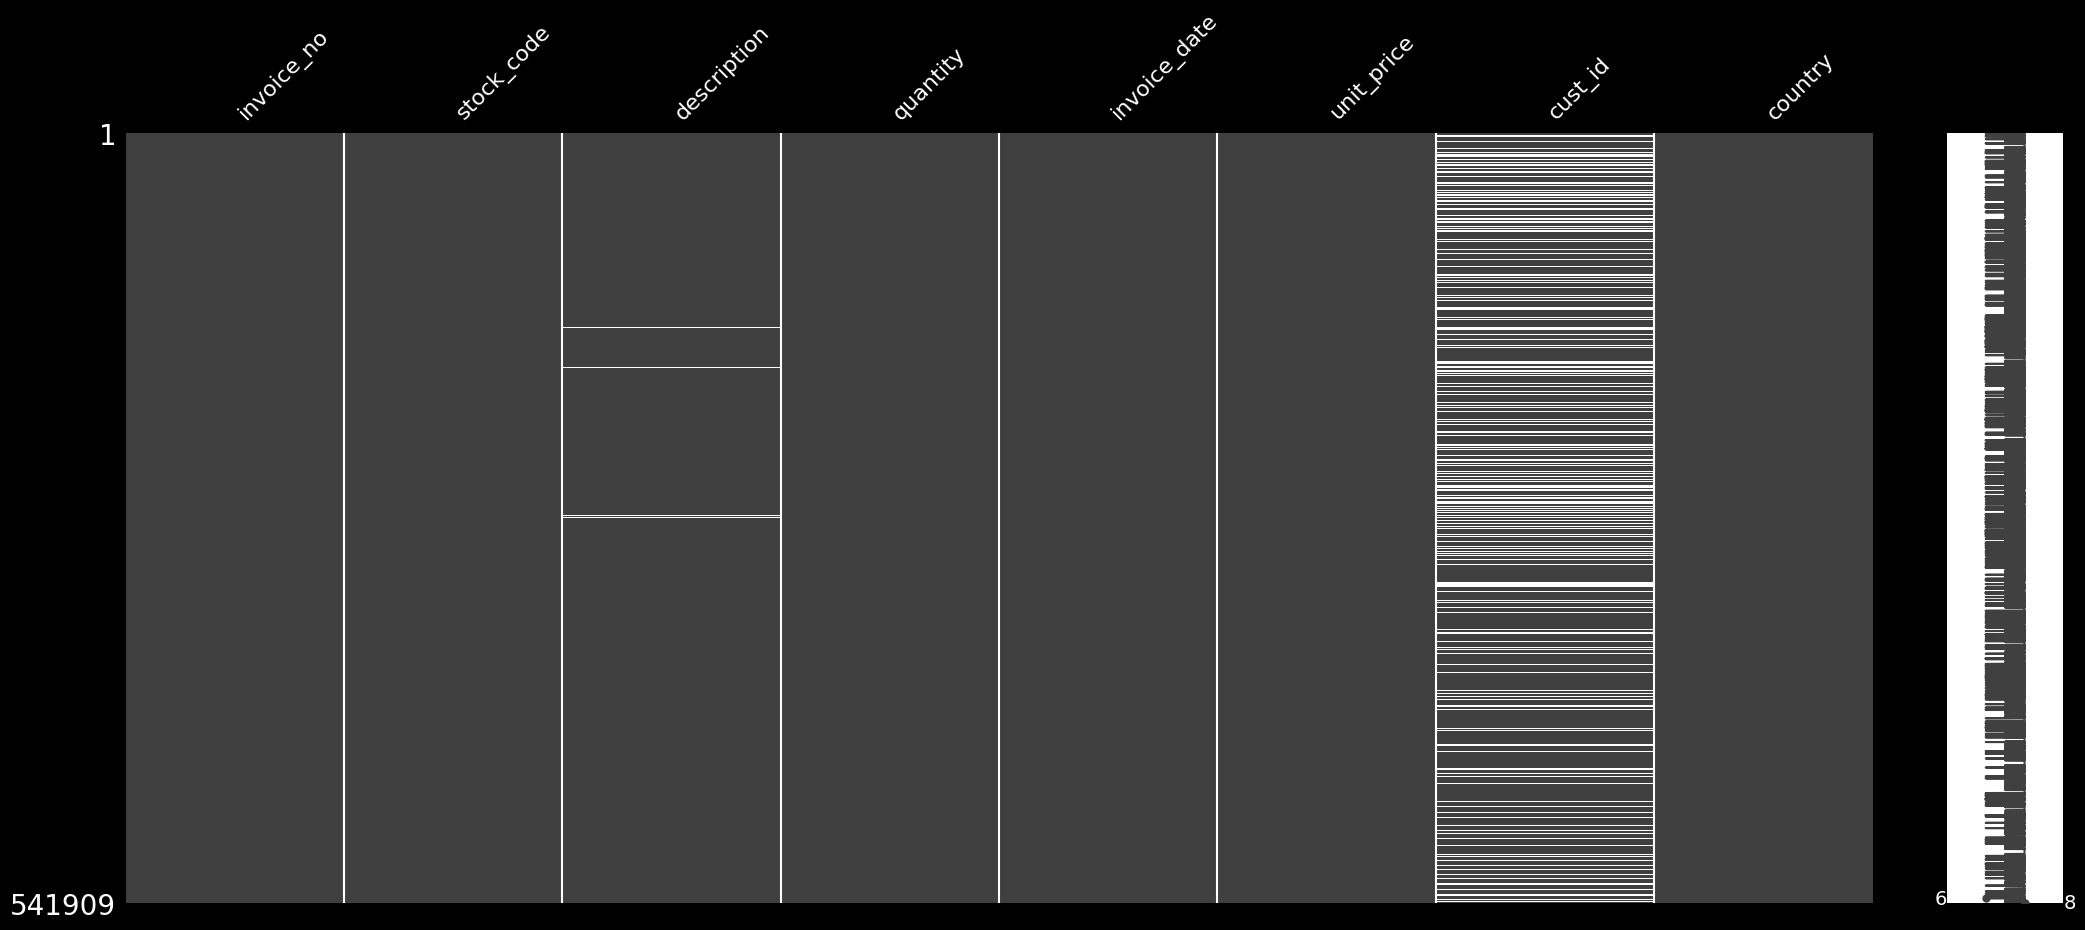

In [10]:
msno.matrix(df)

<Axes: >

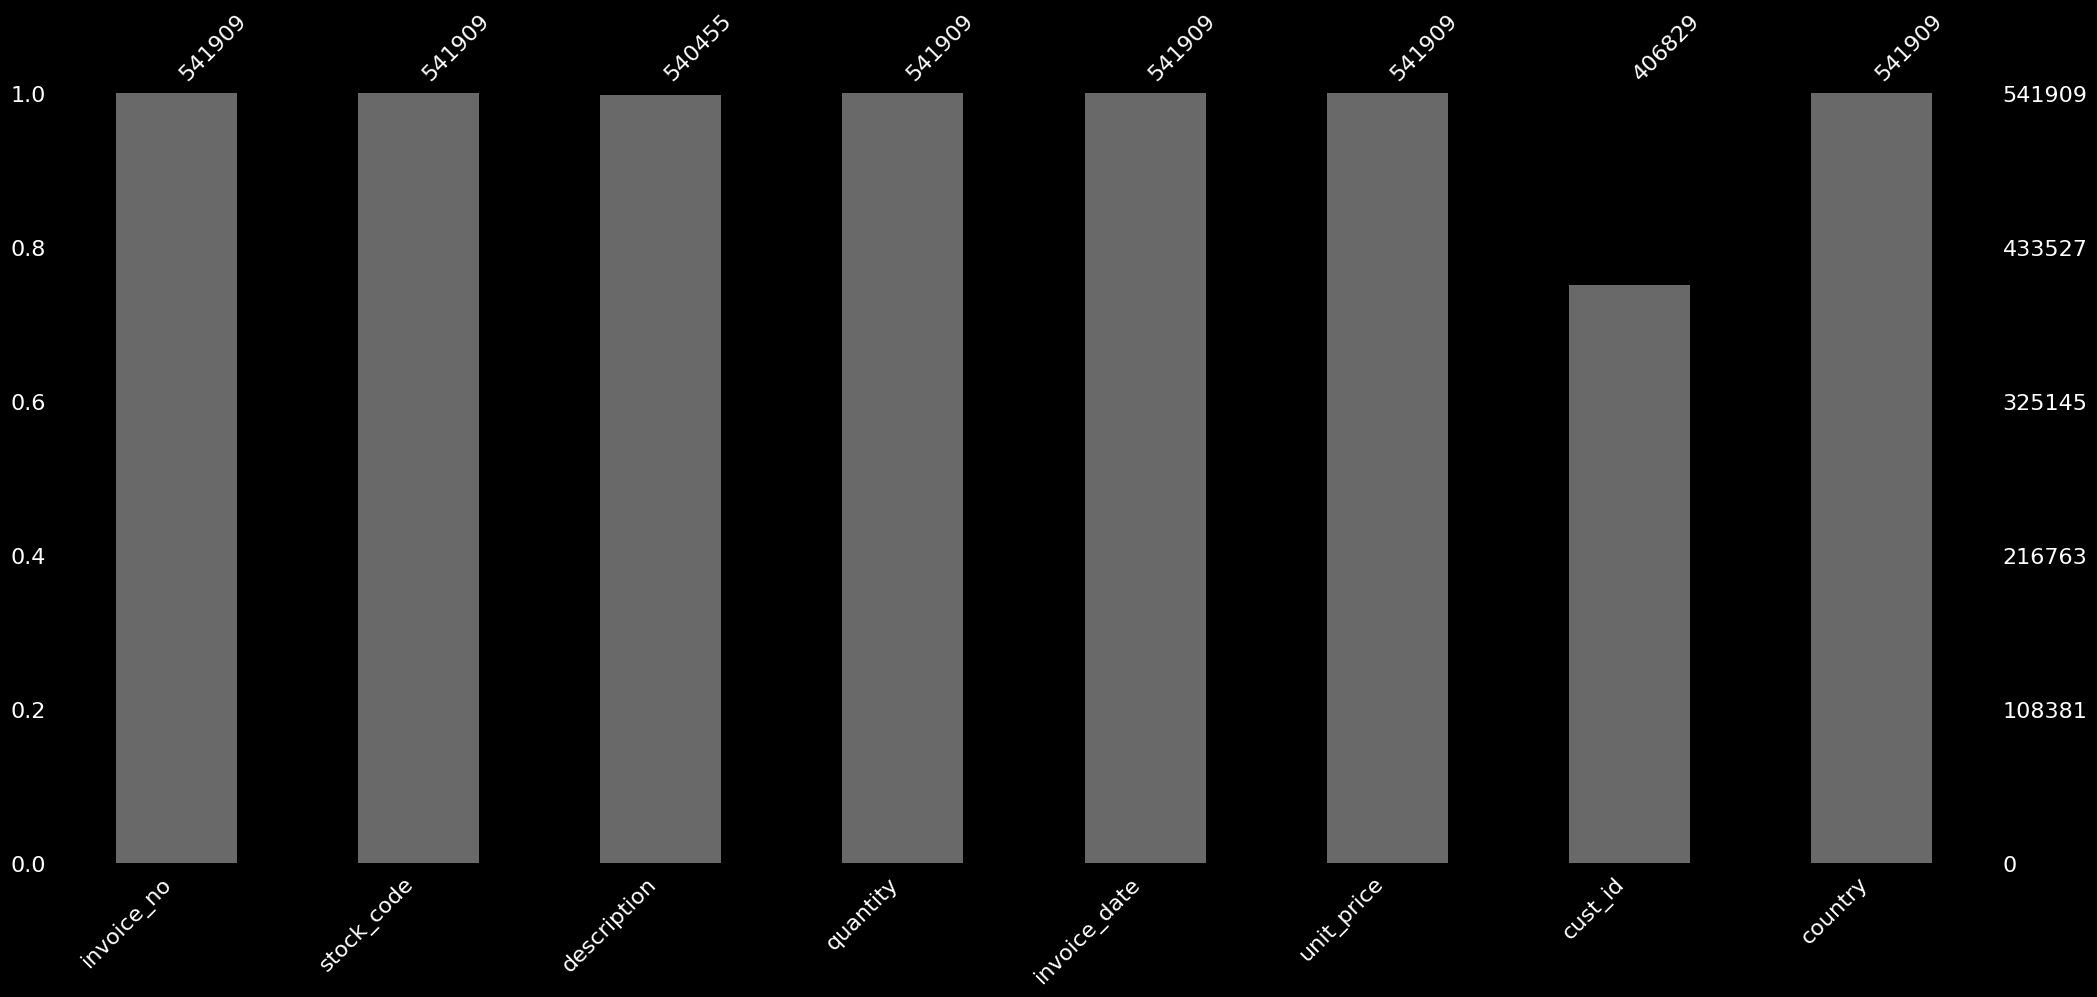

In [11]:
msno.bar(df)

Столбец `cust_id` содержит почти четверть недостающих данных. Поскольку кластеризация основана на поведении и предпочтениях клиентов, крайне важно иметь точные данные об идентификаторах клиентов, эти строки удаляем.

Столбец `description` содержит небольшой процент пропущенных значений, и его можно безопасно удалить.

In [12]:
# удаляем пропущенных значений в датасете
df.dropna(inplace = True)
df.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [13]:
df.shape

(406829, 8)

Проверим отрицательные значения в колонке `quantity` и отмененные заказы в колонке `invoice_no`.

In [14]:
df[df['quantity'] < 0].head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
141,C536379,D,discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,pack of 12 red retrospot tissues,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,chick grey hot water bottle,-12,01-12-2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,plasters in tin vintage paisley,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,plasters in tin skulls,-24,01-12-2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,jam making set with jars,-6,01-12-2010 12:38,4.25,17897.0,United Kingdom


In [15]:
a = df[df['quantity'] < 0].shape[0]
b = df[df['invoice_no'].str.startswith('C') == True].shape[0]
print(f'Количество отрицательных значений в столбце quantity - {a}' '\n'
      f'Количество номеров начинающийся с "C" в столбце invoice_no - {b}')

Количество отрицательных значений в столбце quantity - 8905
Количество номеров начинающийся с "C" в столбце invoice_no - 8905


Отрицательных значений в столбце `quantity` - 8905 и отмененных закозов в столбце `invoice_no` - 8905. Делаем вывод что эти данные взаимозависимые.

In [16]:
# удаляем все отмененные заказы
df = df[df['invoice_no'].str.startswith('C') != True]

In [17]:
a = df[df['quantity'] < 0].shape[0]
b = df[df['invoice_no'].str.startswith('C') == True].shape[0]
print(f'Количество отрицательных значений в столбце quantity - {a}' '\n'
      f'Количество номеров начинающийся с "C" в столбце invoice_no - {b}')

Количество отрицательных значений в столбце quantity - 0
Количество номеров начинающийся с "C" в столбце invoice_no - 0


### 2.3 Проверка дубликатов

In [18]:
# проверим на дубликаты
print(f'Количество дубликатов в наборе данных - {df.duplicated().sum()}')

Количество дубликатов в наборе данных - 5192


In [19]:
# удаляем дубликаты
df.drop_duplicates(inplace = True)

In [20]:
print(f'Количество дубликатов в наборе данных - {df.duplicated().sum()}')

Количество дубликатов в наборе данных - 0


### 2.4 Изменение типов данных

In [21]:
# изменяем тип данных на int
df['cust_id'] = df['cust_id'].astype('int64')

In [22]:
# преобразует колонку из текста в дату
df['invoice_date'] = pd.to_datetime(df.invoice_date)

In [23]:
df['invoice_date'].head(3)

0   2010-01-12 08:26:00
1   2010-01-12 08:26:00
2   2010-01-12 08:26:00
Name: invoice_date, dtype: datetime64[ns]

### 2.5 Анализ датафрейма на аномалии

Посмотрим на колонки `quantity`, `unit_price`.

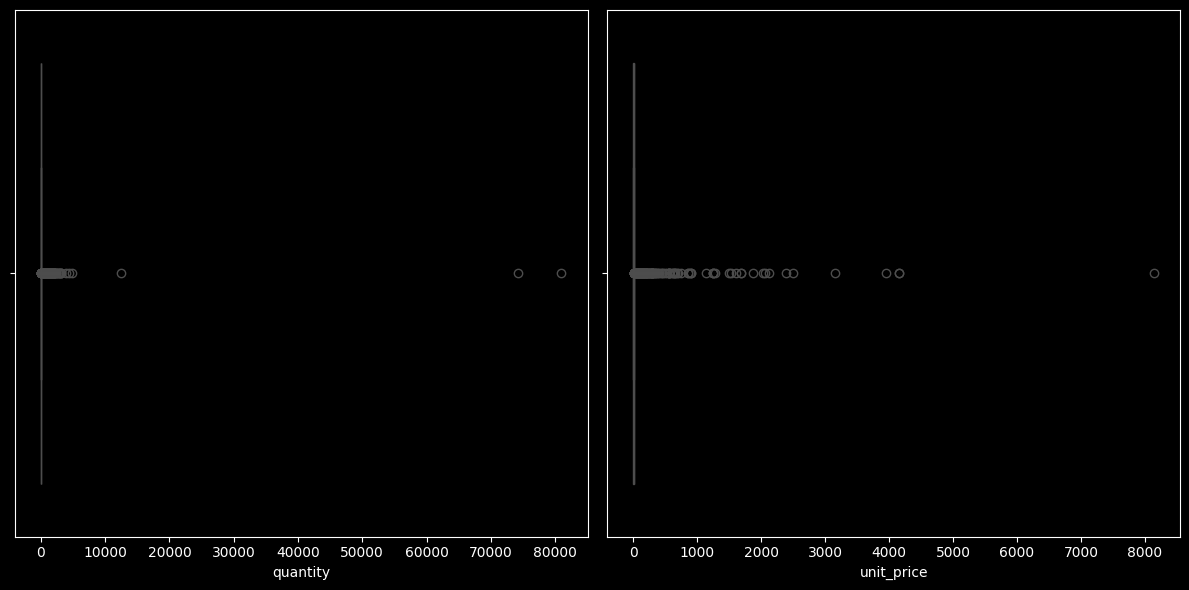

In [24]:
# создаем список из столбцов которые нас интересуют
outlier_cols = ['quantity', 'unit_price']

# устанавливаем размер фигуры
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs = axs.ravel()

# пройдемся циклом по этому списку
for i, col in enumerate(outlier_cols):
    sns.boxplot(x = df[col], color = 'red', ax = axs[i])

plt.tight_layout()

Удаляем выбросы так как их очень мало и они особой роли не сыграют.

In [25]:
df.drop(df[df['quantity'] > 10000].index, inplace = True)

In [26]:
df.drop(df[df['unit_price'] > 3000].index, inplace = True)

In [27]:
df.describe()

,quantity,unit_price,cust_id
count,392724.000000,392724.000000,392724.000000
mean,12.726829,3.065634,15287.762594
std,43.086921,13.150890,1713.558231
min,1.000000,0.000000,12347.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,4800.000000,2500.000000,18287.000000


В столбце `unit_price` есть нулевые значения. Посмотрим сколько их.

In [28]:
df[df['unit_price'] == 0.0].shape[0]

39

39 поцизий что не так много, можно безопасно удалить.

In [29]:
df.drop(df[df['unit_price'] == 0.0].index, inplace = True)

In [30]:
df[df['unit_price'] == 0.0].shape[0]

0

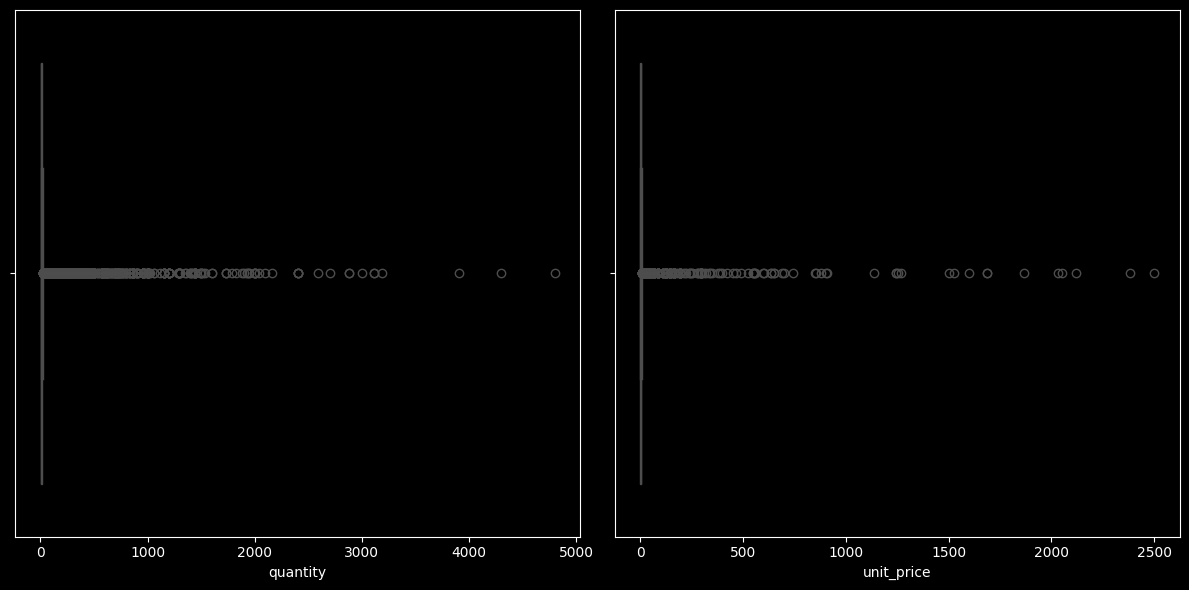

In [31]:
# посмотрим еще раз
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs = axs.ravel()

for i, col in enumerate(outlier_cols):
    sns.boxplot(x = df[col], color='red', ax = axs[i])

plt.tight_layout()

## 3.Добавление дополнительных столбцов

Добавляем столбец **совокупный доход**.

In [32]:
df['amount_price'] = df['quantity'] * df['unit_price']

Добавляем столбцы `День`, `Месяц`, `час`.

In [33]:
df['day'] = df['invoice_date'].dt.day
df['month'] = df['invoice_date'].dt.month
df['hour'] = df['invoice_date'].dt.hour

In [34]:
# проверим слайсингом наши колонки
df.iloc[0:6,-4:]

,amount_price,day,month,hour
0,15.30,12,1,8
1,20.34,12,1,8
2,22.00,12,1,8
3,20.34,12,1,8
4,20.34,12,1,8
5,15.30,12,1,8


In [35]:
df = df.reset_index(drop = True)
df.tail(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount_price,day,month,hour
392684,581587,22138,baking set 9 piece retrospot,3,2011-09-12 12:50:00,4.95,12680,France,14.85,12,9,12


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392685 entries, 0 to 392684
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392685 non-null  object        
 1   stock_code    392685 non-null  object        
 2   description   392685 non-null  object        
 3   quantity      392685 non-null  int64         
 4   invoice_date  392685 non-null  datetime64[ns]
 5   unit_price    392685 non-null  float64       
 6   cust_id       392685 non-null  int64         
 7   country       392685 non-null  object        
 8   amount_price  392685 non-null  float64       
 9   day           392685 non-null  int64         
 10  month         392685 non-null  int64         
 11  hour          392685 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 36.0+ MB


## 4.Исследовательский анализ данных 📊

### 4.1 Клиенты по максимальным и минимальным транзакциям

**Клиенты с наибольшим количеством транзакций**

Text(0.5, 1.0, 'Клиенты с наибольшим количеством транзакций')

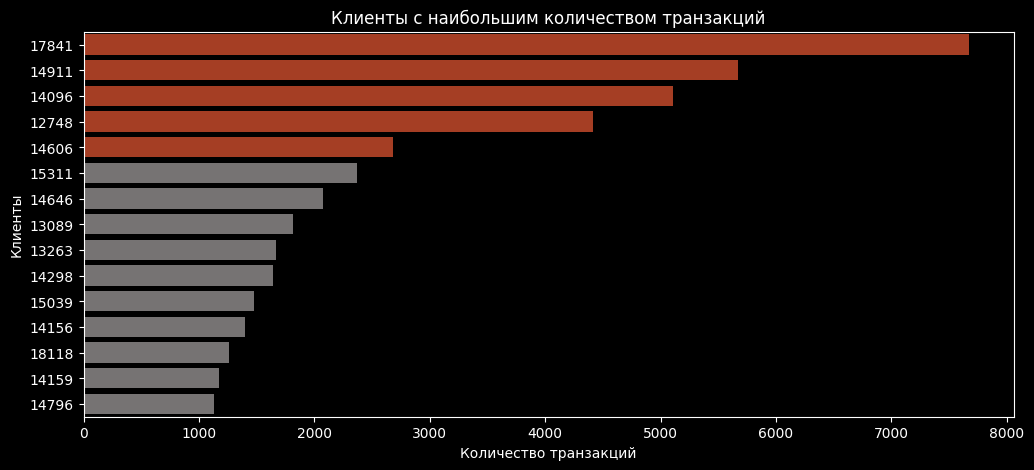

In [37]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# считаем количество транзакций для каждого клиента (не более 15)
max_transactions_customer = df.cust_id.value_counts().sort_values(ascending = False).head(15)

# создаем цветовую палитру
colors = ['#eb3e13' if i < 5 else '#949191' for i in range(len(max_transactions_customer))]

# строим barplot
sns.barplot(x = max_transactions_customer.values, y = max_transactions_customer.index,
            palette = colors, order = max_transactions_customer.index, orient = 'h', alpha = 0.8)

# настройка графика
plt.xlabel('Количество транзакций')
plt.ylabel('Клиенты')
plt.title('Клиенты с наибольшим количеством транзакций')

**Клиенты с одной транзакцией**

In [38]:
# строим таблицу
min_transactions_customer = df.cust_id.value_counts().sort_values(ascending = True).head(71).reset_index()
min_transactions_customer.rename(columns = {'index': 'cust_id', 'cust_id': 'quantity_transactions'}, inplace = True)

# задаем стиль
styled_top_description = min_transactions_customer.style.background_gradient(cmap = 'binary', subset = ['quantity_transactions'])

styled_top_description

,cust_id,quantity_transactions
0,15753,1
1,16737,1
2,18174,1
3,18268,1
4,17752,1
5,13106,1
6,15524,1
7,13017,1
8,16323,1
9,17715,1


Количество клиентов с одной транзакцией - 70.

### 4.2 Географический анализ

**Страны с наибольшим количеством транзакций**

Text(0.5, 1.0, 'Страны с наибольшим количеством транзакций')

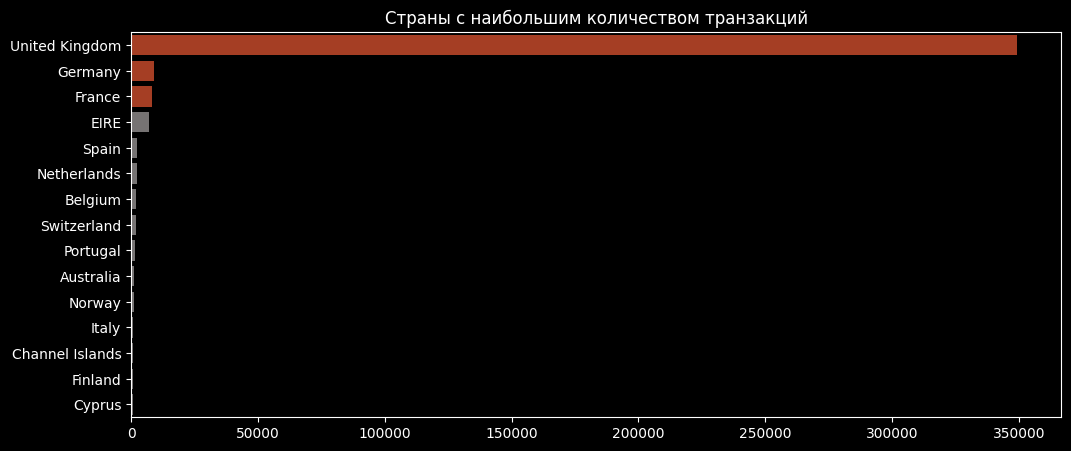

In [39]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# считаем количество транзакций для каждого клиента (покажем 15)
max_transactions_country = df.country.value_counts().sort_values(ascending = False).head(15)

# создаем цветовую палитру
colors = ['#eb3e13' if i < 3 else '#949191' for i in range(len(max_transactions_country))]

# строим barplot
sns.barplot(x = max_transactions_country.values, y = max_transactions_country.index,
            palette = colors, order = max_transactions_country.index, orient = 'h', alpha = 0.8)

# настройка графика
plt.xlabel('')
plt.ylabel('')
plt.title('Страны с наибольшим количеством транзакций')

### 4.3 Паттерны покупок

**Топ-10 самых продаваемых товаров в мире**

Text(0.5, 1.0, 'Топ-10 самых популярных продуктов')

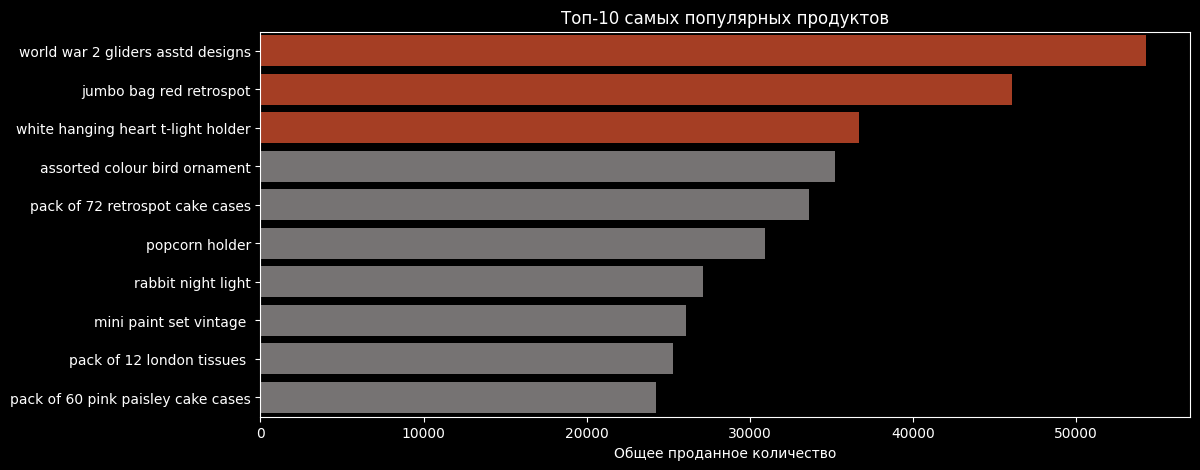

In [40]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# группируем данные по 'description'
top_description = df.groupby('description')['quantity'].sum().sort_values(ascending = False).head(10)

# cоздаем цветовую палитру
colors = ['#eb3e13' if i < 3 else '#949191' for i in range(len(top_description ))]

# строим barplot
sns.barplot(x = top_description .values, y = top_description .index, palette = colors, orient = 'h', alpha = 0.8)

# настройка графика
plt.xlabel('Общее проданное количество')
plt.ylabel('')
plt.title('Топ-10 самых популярных продуктов')

Первые три места по продуктам:
- Планеры времен Второй мировой войны, дизайн Asstd
- Большая сумка красного цвета Retrospot
- Белый подвесной держатель в форме сердца


**Топ-10 наименее продаваемых товаров в мире**

Text(0.5, 1.0, 'Топ-10 наименее популярных продуктов')

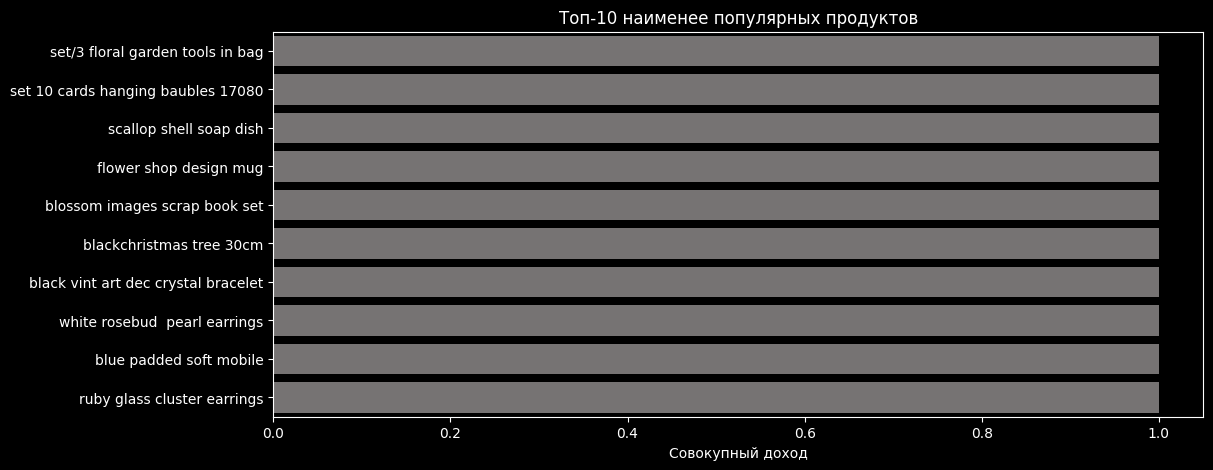

In [41]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# группируем данные по 'description'
top_description_min = df.groupby('description')['quantity'].sum().sort_values(ascending = True).head(10)


# строим barplot
sns.barplot(x = top_description_min.values, y = top_description_min.index, color = '#949191', orient = 'h', alpha = 0.8)

# настройка графика
plt.xlabel('Совокупный доход')
plt.ylabel('')
plt.title('Топ-10 наименее популярных продуктов')

Наименее популярных продуктов получилось более 10.

Посмотрим на результат через таблицы

In [42]:
# строим таблицу
top_description = df.groupby('description')['quantity'].sum().sort_values(ascending = False).head(10)

# задаем стиль
styled_top_description = top_description.reset_index().style.background_gradient(cmap = 'binary', subset = ['quantity'])

styled_top_description

,description,quantity
0,world war 2 gliders asstd designs,54319
1,jumbo bag red retrospot,46078
2,white hanging heart t-light holder,36706
3,assorted colour bird ornament,35263
4,pack of 72 retrospot cake cases,33670
5,popcorn holder,30919
6,rabbit night light,27153
7,mini paint set vintage,26076
8,pack of 12 london tissues,25329
9,pack of 60 pink paisley cake cases,24230


In [43]:
# строим таблицу
top_description_min = df.groupby('description')['quantity'].sum().sort_values(ascending = True).head(60)

# задаем стиль
styled_top_description_min = top_description_min.reset_index().style.background_gradient(
                                                  cmap = 'binary', subset = ['quantity'])

styled_top_description_min

,description,quantity
0,set/3 floral garden tools in bag,1
1,set 10 cards hanging baubles 17080,1
2,scallop shell soap dish,1
3,flower shop design mug,1
4,blossom images scrap book set,1
5,blackchristmas tree 30cm,1
6,black vint art dec crystal bracelet,1
7,white rosebud pearl earrings,1
8,blue padded soft mobile,1
9,ruby glass cluster earrings,1


Наименее популярные товаров - 59 шт.

### 4.4 Влияния сезонных и временных колебаний на продажи

Text(0.5, 0, '')

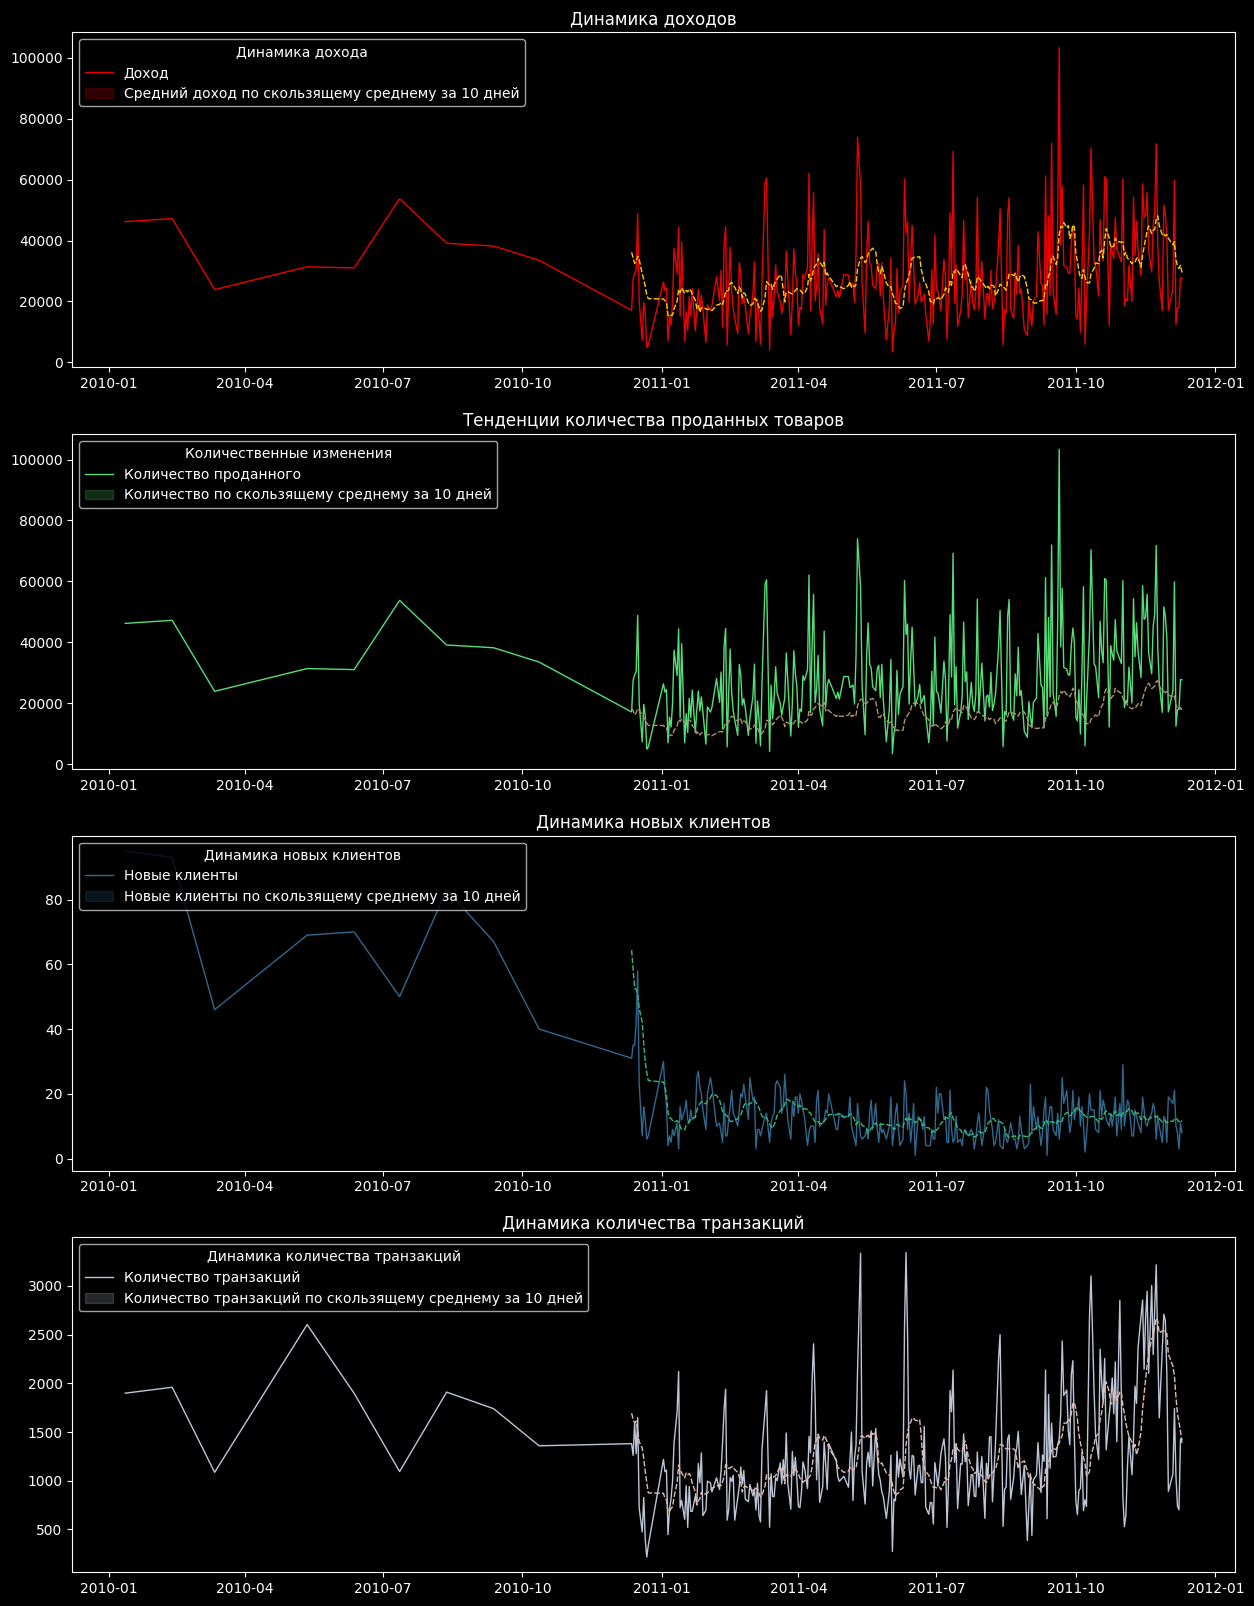

In [45]:
# устанавливаем размер фигуры
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 20))

rev = df[df['amount_price'] >= 0]
rev['transactions_count'] = 1

# группирует данные по invoice_date и применяем агрегирование к выбранным столбцам
rev = rev.groupby(rev['invoice_date'].dt.date).agg({'amount_price':'sum',
                                                  'quantity': 'sum',
                                                  'cust_id': 'count',
                                                  'transactions_count':'sum'})

# рачсет - скользящего среднего за 10 дней для столбцов. Среднее значение за каждые 10 дней
rev['10 Days Moving Average Revenue'] = rev['amount_price'].rolling(10).mean()
rev['10 Days Moving Average Quantity'] = rev['quantity'].rolling(10).mean()
rev['10 Days Moving Transactions Count'] = rev['transactions_count'].rolling(10).mean()


# получим дату и количество уникальных cust_id, а также скользящую среднюю за 10 дней для этого количества
cust = df.groupby('cust_id').first().reset_index()[['cust_id','invoice_date']]
cust = cust.groupby(cust.invoice_date.dt.date).agg({'cust_id':'count'})
cust['10 Days Moving Average Quantity'] = cust['cust_id'].rolling(10).mean()

# строим линейный график
sns.lineplot(data = rev[['amount_price','10 Days Moving Average Revenue']],
             palette = 'hot', linewidth = 1.0, ax = ax[0], legend = False)

# настройка графика
ax[0].legend(title = 'Динамика дохода', loc = 'upper left',
             labels = ['Доход', 'Cредний доход по скользящему среднему за 10 дней'])
ax[0].title.set_text('Динамика доходов')
ax[0].set_xlabel('')

# строим линейный график
sns.lineplot(data = rev[['amount_price','10 Days Moving Average Quantity']],
                        palette = 'terrain', linewidth = 1.0, ax = ax[1])
# настройка графика
ax[1].legend(title = 'Количественные изменения', loc = 'upper left',
             labels = ['Количество проданного', 'Количество по скользящему среднему за 10 дней'])
ax[1].title.set_text('Тенденции количества проданных товаров')
ax[1].set_xlabel('')

# строим линейный график
sns.lineplot(data = cust, palette = 'viridis', linewidth = 1.0, ax = ax[2])

# настройка графика
ax[2].legend(title = 'Динамика новых клиентов', loc = 'upper left',
             labels = ['Новые клиенты', 'Новые клиенты по скользящему среднему за 10 дней'])
ax[2].title.set_text('Динамика новых клиентов')
ax[2].set_xlabel('')

# строим линейный график
sns.lineplot(data = rev[['transactions_count', '10 Days Moving Transactions Count']],
                                    palette = 'vlag', linewidth = 1.0, ax = ax[3])

# настройка графика
ax[3].legend(title = 'Динамика количества транзакций', loc = 'upper left',
             labels = ['Количество транзакций', 'Количество транзакций по скользящему среднему за 10 дней'])
ax[3].title.set_text('Динамика количества транзакций')
ax[3].set_xlabel('')

In [46]:
df[df['invoice_date'].dt.year == 2010].shape[0]

25670

Посмотрим только 2011 год.

Text(0.5, 0, '')

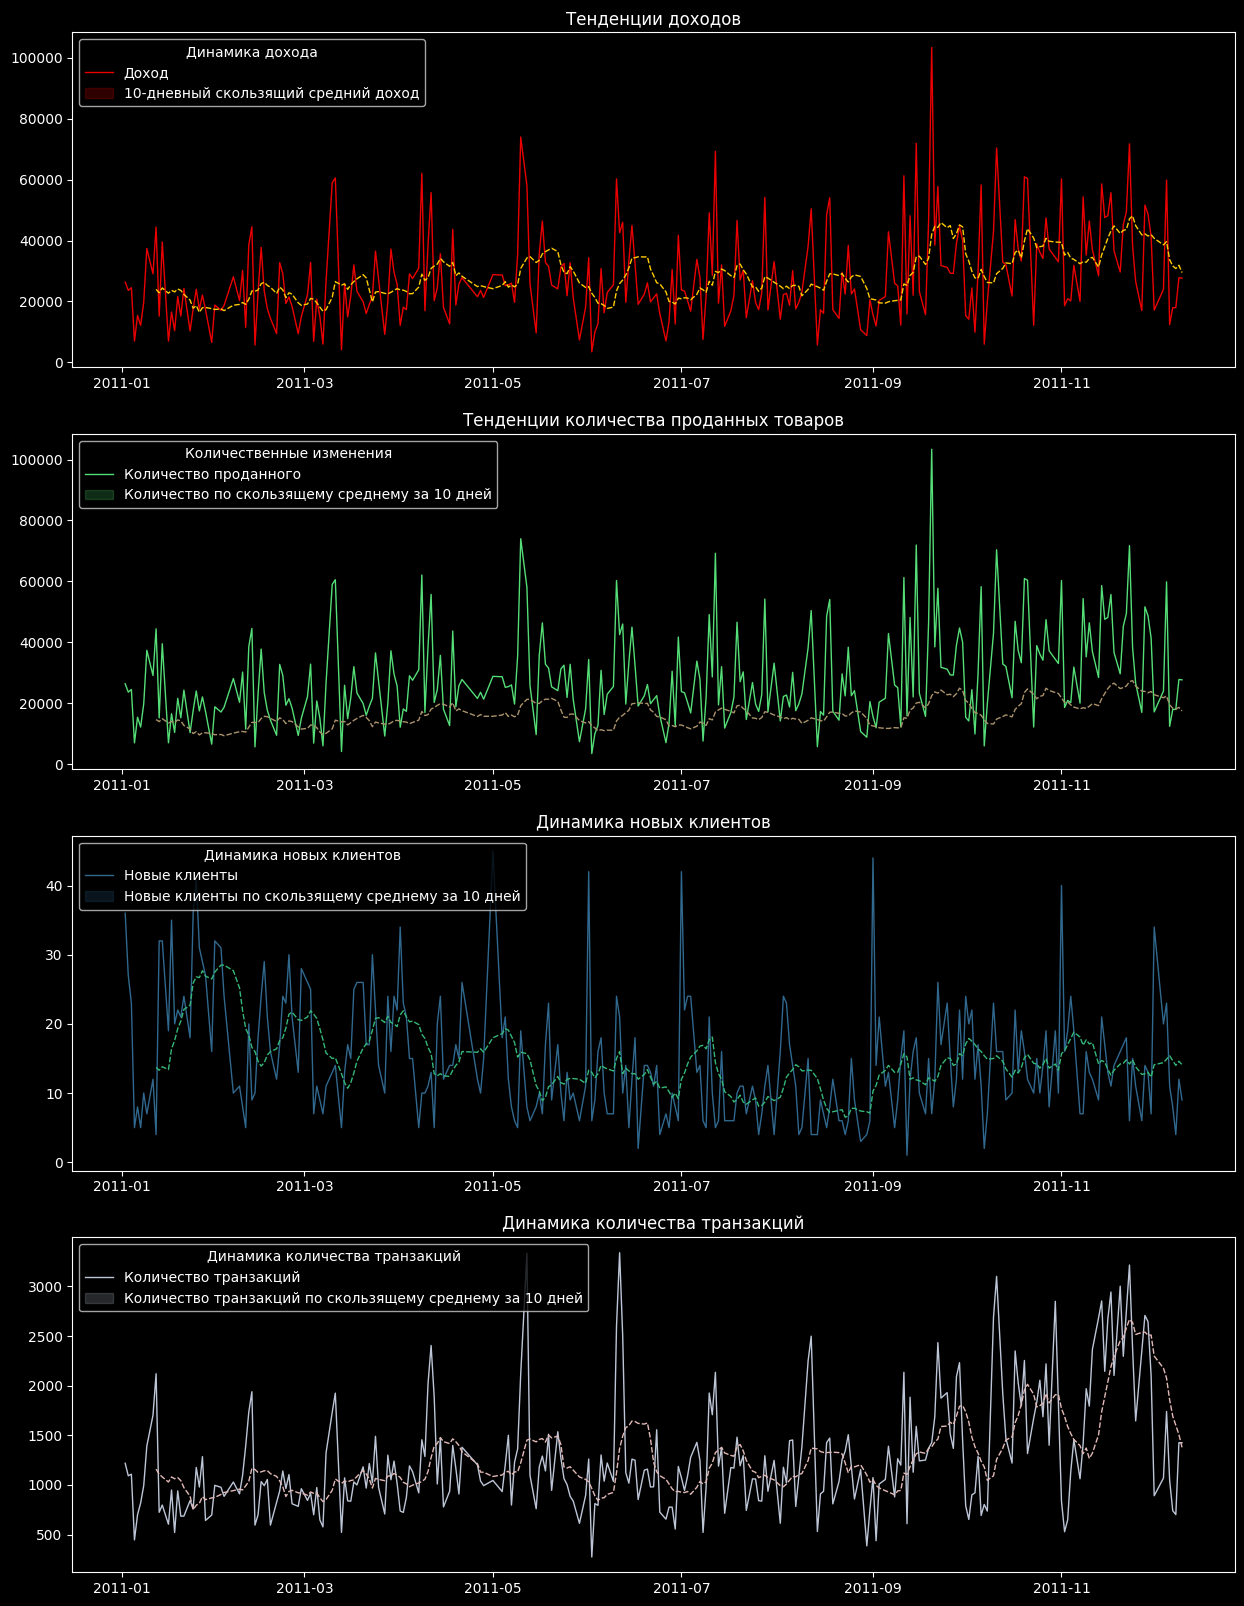

In [48]:
# устанавливаем размер фигуры
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 20))

# фильтр только 2011
rev2011 = df[(df['amount_price'] > 0) & (df['invoice_date'].dt.year == 2011)]
rev2011['transactions_count'] = 1

# группирует данные по invoice_date и применяем агрегирование к выбранным столбцам
rev2011 = rev2011.groupby(rev2011['invoice_date'].dt.date).agg({'amount_price':'sum',
                                                  'quantity': 'sum',
                                                  'cust_id': 'count',
                                                  'transactions_count':'sum'})

# рачсет - скользящего среднего за 10 дней для столбцов. Среднее значение за каждые 10 дней
rev2011['10 Days Moving Average Revenue'] = rev2011['amount_price'].rolling(10).mean()
rev2011['10 Days Moving Average Quantity'] = rev2011['quantity'].rolling(10).mean()
rev2011['10 Days Moving Transactions Count'] = rev2011['transactions_count'].rolling(10).mean()

# фильтр только 2011
cust2011 = df[(df['amount_price'] > 0) & (df['invoice_date'].dt.year == 2011)]

# получим дату и количество уникальных cust_id, а также скользящую среднюю за 10 дней для этого количества.
cust2011 = cust2011.groupby('cust_id').first().reset_index()[['cust_id','invoice_date']]
cust2011 = cust2011.groupby(cust2011.invoice_date.dt.date).agg({'cust_id':'count'})
cust2011['10 Days Moving Average Quantity'] = cust2011['cust_id'].rolling(10).mean()

# строим линейный график
sns.lineplot(data = rev2011[['amount_price','10 Days Moving Average Revenue']],
                    palette = 'hot', linewidth = 1.0, ax = ax[0], legend = False)

# настройка графика
ax[0].legend(title = 'Динамика дохода', loc = 'upper left', labels = ['Доход', '10-дневный скользящий средний доход'])
ax[0].title.set_text('Тенденции доходов')
ax[0].set_xlabel('')

# строим линейный график
sns.lineplot(data = rev2011[['amount_price','10 Days Moving Average Quantity']],
                              palette = 'terrain', linewidth = 1.0, ax = ax[1])
# настройка графика
ax[1].legend(title = 'Количественные изменения', loc = 'upper left',
             labels = ['Количество проданного', 'Количество по скользящему среднему за 10 дней'])
ax[1].title.set_text('Тенденции количества проданных товаров')
ax[1].set_xlabel('')

# строим линейный график
sns.lineplot(data = cust2011, palette = 'viridis', linewidth = 1.0, ax = ax[2])

# настройка графика
ax[2].legend(title = 'Динамика новых клиентов', loc = 'upper left',
             labels = ['Новые клиенты', 'Новые клиенты по скользящему среднему за 10 дней'])
ax[2].title.set_text('Динамика новых клиентов')
ax[2].set_xlabel('')

# строим линейный график
sns.lineplot(data = rev2011[['transactions_count','10 Days Moving Transactions Count']],
                                          palette = 'vlag', linewidth = 1.0, ax = ax[3])
# настройка графика
ax[3].legend(title='Динамика количества транзакций', loc = 'upper left',
             labels = ['Количество транзакций', 'Количество транзакций по скользящему среднему за 10 дней'])
ax[3].title.set_text('Динамика количества транзакций')
ax[3].set_xlabel('')

**Ежемесячная динамика дохода**

Text(0.5, 1.0, 'Тенденция ежемесячного дохода')

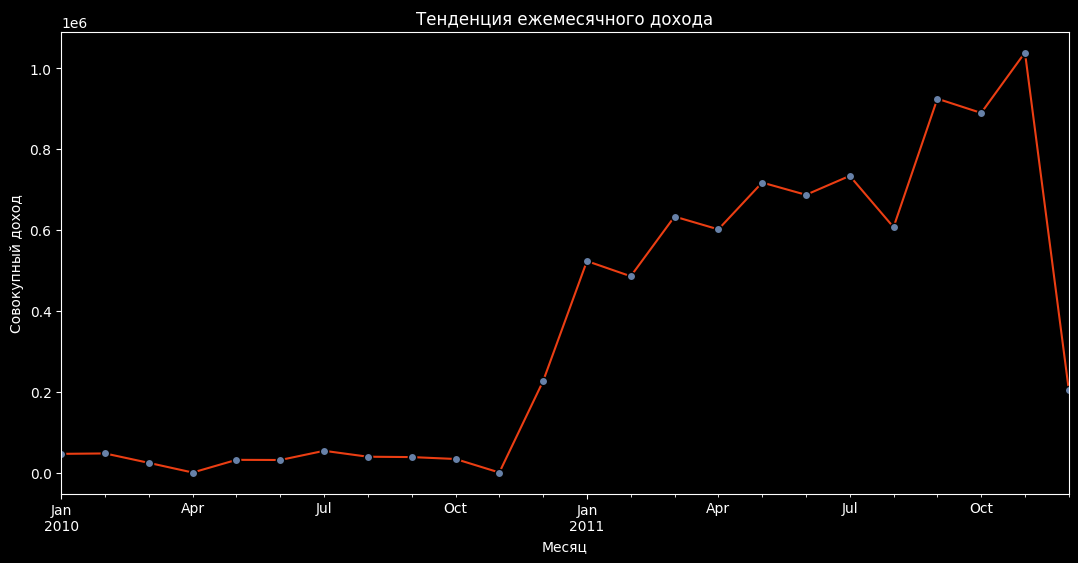

In [49]:
# устанавливаем размер фигуры
plt.figure(figsize = (13, 6))

# строим линейный график
monthly_revenue = df.resample('M', on = 'invoice_date')['amount_price'].sum().plot(kind = 'line',
                                                                                   color = '#eb3e13',
                                                                                   marker = 'o',
                                                                                   markerfacecolor = '#6781a8',
                                                                                   markeredgecolor = '#000000')

# настройка графика
plt.xlabel('Месяц')
plt.ylabel('Совокупный доход')
plt.title('Тенденция ежемесячного дохода')

Возьмем тенденцию продаж начиная с периода  декабря 2010 по декабрь 2011 года, общий объем продаж был довольно стабильным до августа 2011 года. Общий объем продаж резко увеличился и почти умножился на 3.
Это увеличение также может быть связано с концом года. Праздники, на которых люди склонны покупать больше продуктов.

**Средняя цена за единицу товара в течении времени**

Text(0.5, 1.0, 'Тенденция средней цены за единицу товара')

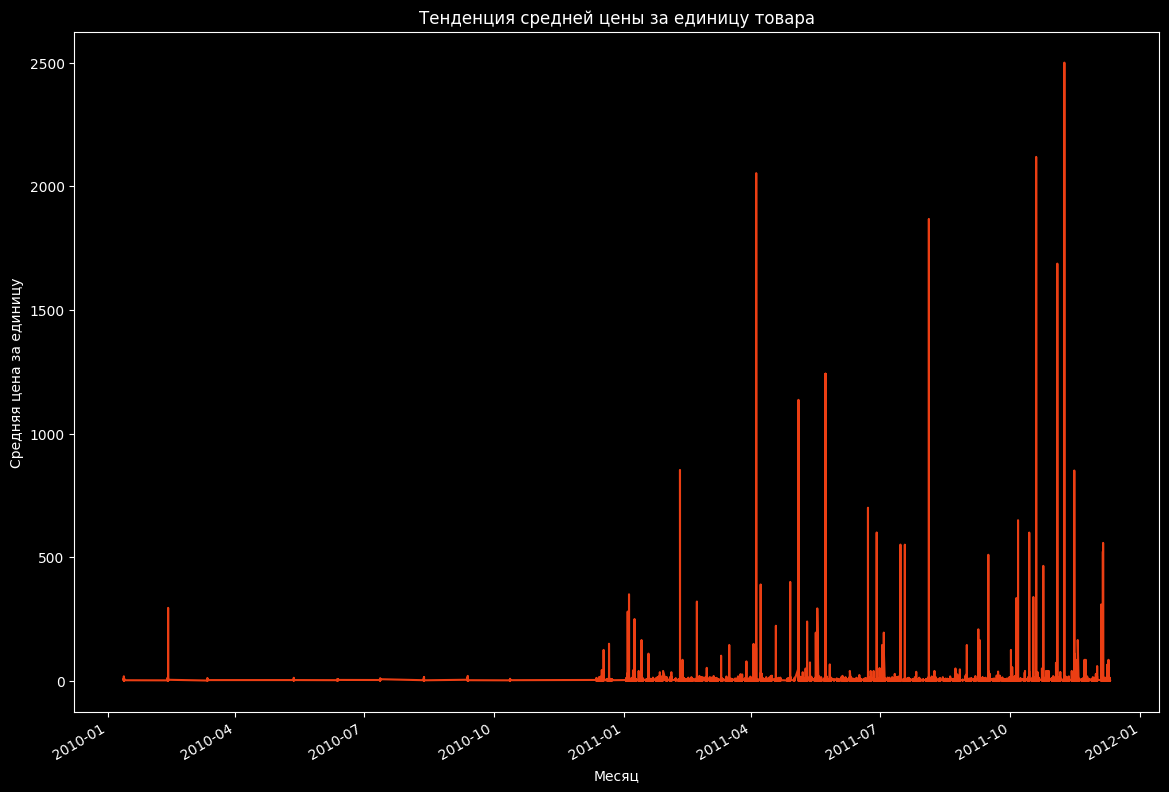

In [50]:
# устанавливаем размер фигуры
plt.figure(figsize = (14, 10))

# группируем данные по 'invoice_date', вычисляем медианную цену 'unit_price' и строим график
invoice_date_unit_price = df.groupby('invoice_date')['unit_price'].mean().plot(color = '#eb3e13')

# настройка графика
plt.xlabel('Месяц')
plt.ylabel('Средняя цена за единицу')
plt.title('Тенденция средней цены за единицу товара')

**Ежедневная динамика дохода**

Text(0.5, 1.0, 'Тенденция ежедневного дохода')

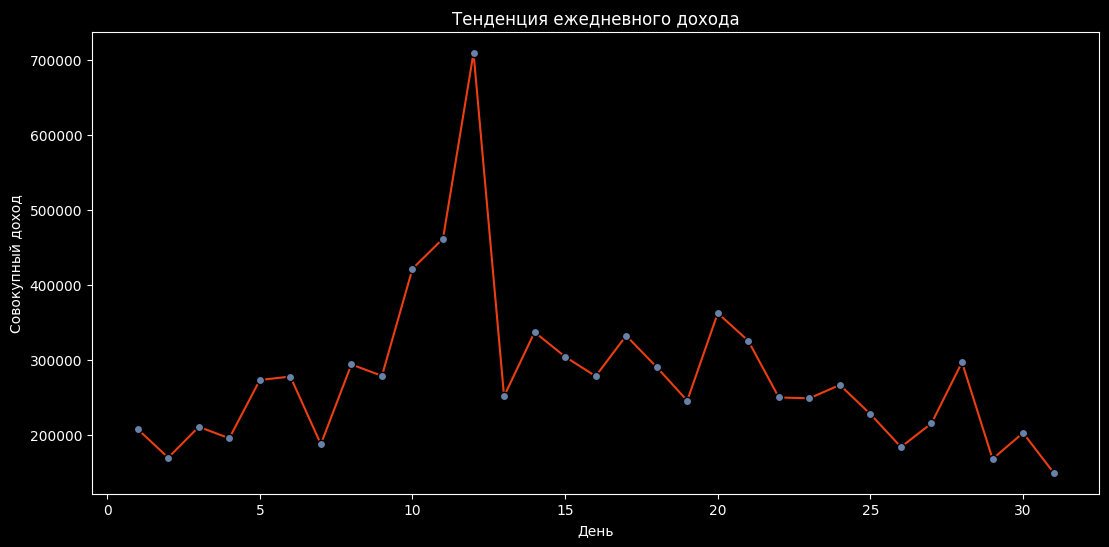

In [51]:
# устанавливаем размер фигуры
plt.figure(figsize = (13, 6))

# строим линейный график
day_amount_price = df.groupby(['day'])['amount_price'].sum().plot(kind = 'line',
                                                                  color = '#eb3e13',
                                                                  marker = 'o',
                                                                  markerfacecolor = '#6781a8',
                                                                  markeredgecolor = '#000000')

# настройка графика
plt.xlabel('День')
plt.ylabel('Совокупный доход')
plt.title('Тенденция ежедневного дохода')

Максимальные продажи приходятся с 10 по 14 число каждого месяца.

**Средний объем продаж в месяц**

Text(0.5, 1.0, 'Средний объем продаж в месяц')

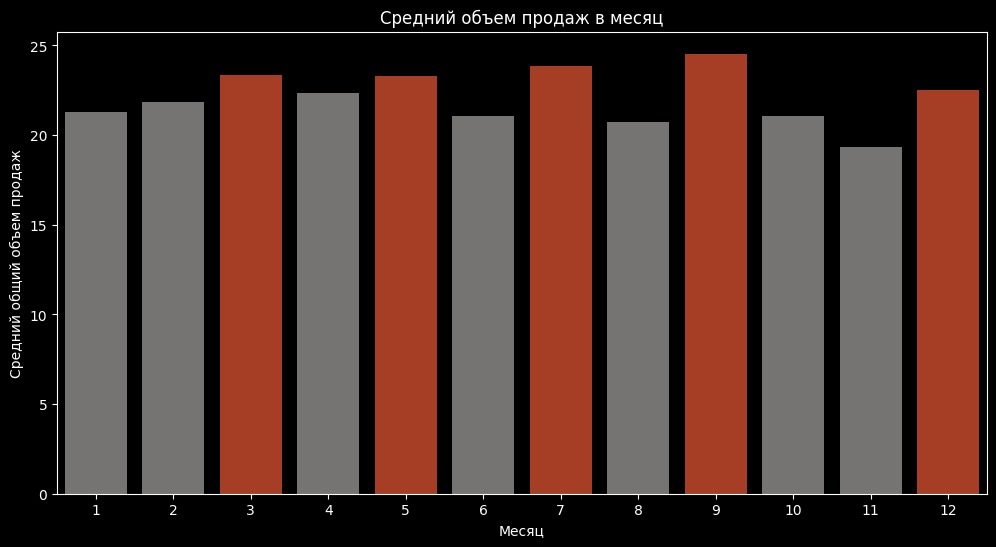

In [53]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 6))

# группируем данные по 'month'
per_month = df.groupby('month')['amount_price'].mean()

# cоздаем цветовую палитру
colors = ['#949191' if month not in [3, 5, 7, 9, 12] else '#eb3e13' for month in per_month.index]

# строим barplot
sns.barplot(x = per_month.index, y = per_month.values, palette = colors, alpha = 0.8)

# настройка графика
plt.xlabel('Месяц')
plt.ylabel('Средний общий объем продаж')
plt.title('Средний объем продаж в месяц')

Самые прибыльные месяца:
- Сентябрь
- Июль
- Март
- Май
- Декабрь

**Общий объем продаж по месяцам**

Text(0.5, 1.0, 'Общий объем продаж по месяцам')

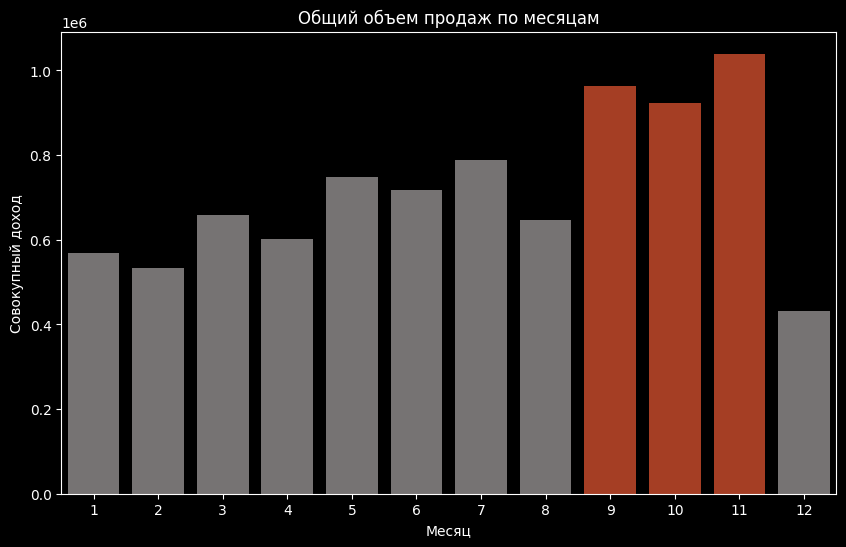

In [54]:
# устанавливаем размер фигуры
plt.figure(figsize = (10, 6))

# группируем данные по 'month'
per_month_sum = df.groupby('month')['amount_price'].sum()

# cоздаем цветовую палитру
colors = ['#949191' if month not in [9, 10, 11] else '#eb3e13' for month in per_month_sum.index]

# строим barplot
sns.barplot(x = per_month_sum.index, y = per_month_sum.values, palette = colors, alpha = 0.8)

# настройка графика
plt.xlabel('Месяц')
plt.ylabel('Совокупный доход')
plt.title('Общий объем продаж по месяцам')

Самые прибыльные месяца:
- Ноябрь
- Сентябрь
- Октябрь

**Транзакции по дням недели**

Text(0.5, 1.0, 'Распределение транзакций по дням недели')

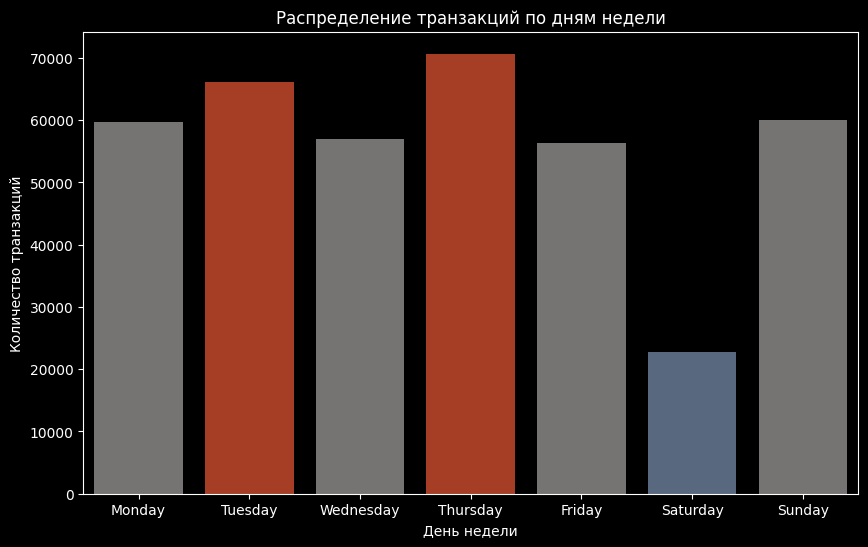

In [55]:
# устанавливаем размер фигуры
plt.figure(figsize = (10, 6))

# создаем дни недели при помощи dt.day_name()
df['dayweeks'] = df['invoice_date'].dt.day_name()

# cоздаем цветовую палитру
colors = {'Monday': '#949191', 'Tuesday': '#eb3e13', 'Wednesday': '#949191',
              'Thursday': '#eb3e13', 'Friday': '#949191', 'Saturday': '#6781a8', 'Sunday': '#949191'}

# строим countplot
sns.countplot(x = 'dayweeks', data = df, order = ['Monday', 'Tuesday',  'Wednesday','Thursday', 'Friday',
                                                  'Saturday', 'Sunday'], palette = colors, alpha = 0.8)
# настройка графика
plt.xlabel('День недели')
plt.ylabel('Количество транзакций')
plt.title('Распределение транзакций по дням недели')

Всех больше транзакций происходит в четверг и во вторник, а всех меньше на субботу.

**Почасовое распределение транзакций**

Text(0.5, 1.0, 'Почасовое распределение транзакций')

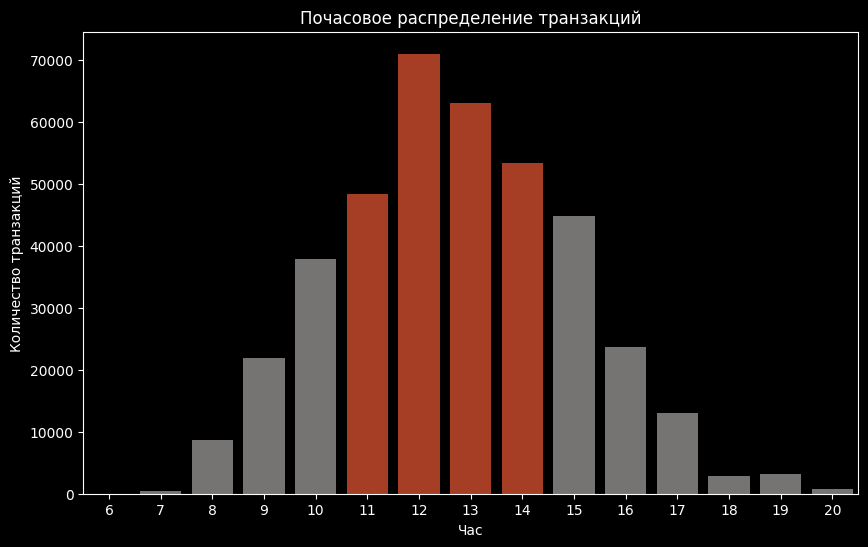

In [56]:
# устанавливаем размер фигуры
plt.figure(figsize = (10, 6))

# подсчитываем количество транзакций для каждого часа
hourly_transactions = df['hour'].value_counts().sort_index()

# cоздаем цветовую палитру
colors = ['#949191' if i not in [11, 12, 13, 14] else '#eb3e13' for i in hourly_transactions.index]

# строим barplot
sns.barplot(x = hourly_transactions.index, y = hourly_transactions.values, palette = colors, alpha = 0.8)

# настройка графика
plt.xlabel('Час')
plt.ylabel('Количество транзакций')
plt.title('Почасовое распределение транзакций')

Максимальное количество транзакций приходится на время с 11:00 до 14:00.

Видно, что транзакции не проводятся до 6:00 и после 20:00. Можно предположить, что магазин обычно открыт на 14 часов с 6:00 до 20:00.

### 4.5 Тенденции потребительского рынка по странам

**Топ-10 стран по покупкам**

Text(0.5, 1.0, 'Топ-10 стран по покупкам')

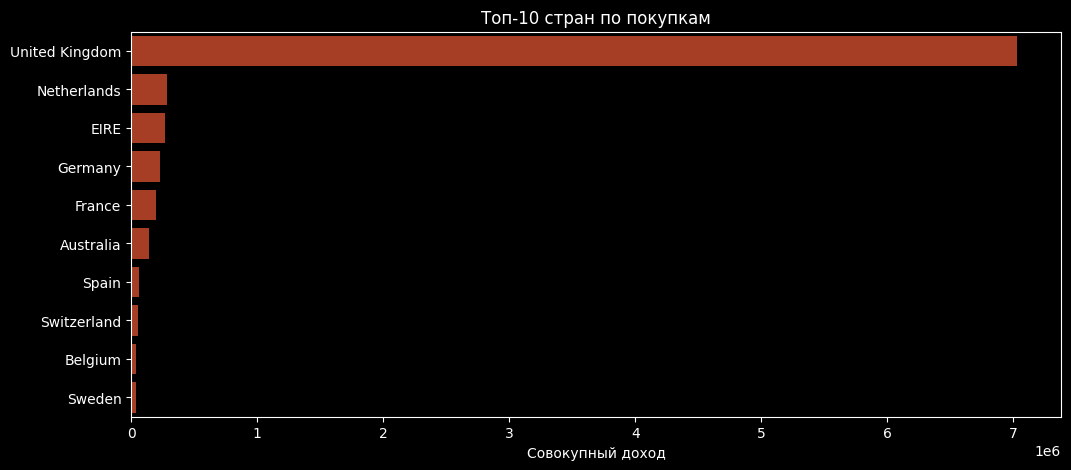

In [57]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# группируем данные по 'country' и считаем сумму 'amount_price'
country_amount_price = df.groupby('country')['amount_price'].sum().sort_values(ascending = False).head(10)

# строим barplot
sns.barplot(x = country_amount_price.values,
            y = country_amount_price.index,
            color = '#eb3e13',
            orient = 'h',
            alpha = 0.8)

# настройка графика
plt.xlabel('Совокупный доход')
plt.ylabel('')
plt.title('Топ-10 стран по покупкам')

Посмотрим на результат через таблицу:

In [58]:
# задаем стиль
styled_country_amount_price = country_amount_price.reset_index().\
                              style.background_gradient(cmap = 'binary', subset = ['amount_price'])

styled_country_amount_price

,country,amount_price
0,United Kingdom,7028072.744000
1,Netherlands,285446.340000
2,EIRE,265262.460000
3,Germany,228678.400000
4,France,200612.190000
5,Australia,138453.810000
6,Spain,61558.560000
7,Switzerland,56443.950000
8,Belgium,41196.340000
9,Sweden,38367.830000


**Средний объем покупок по стране**

Text(0.5, 1.0, 'Средний объем покупок по стране')

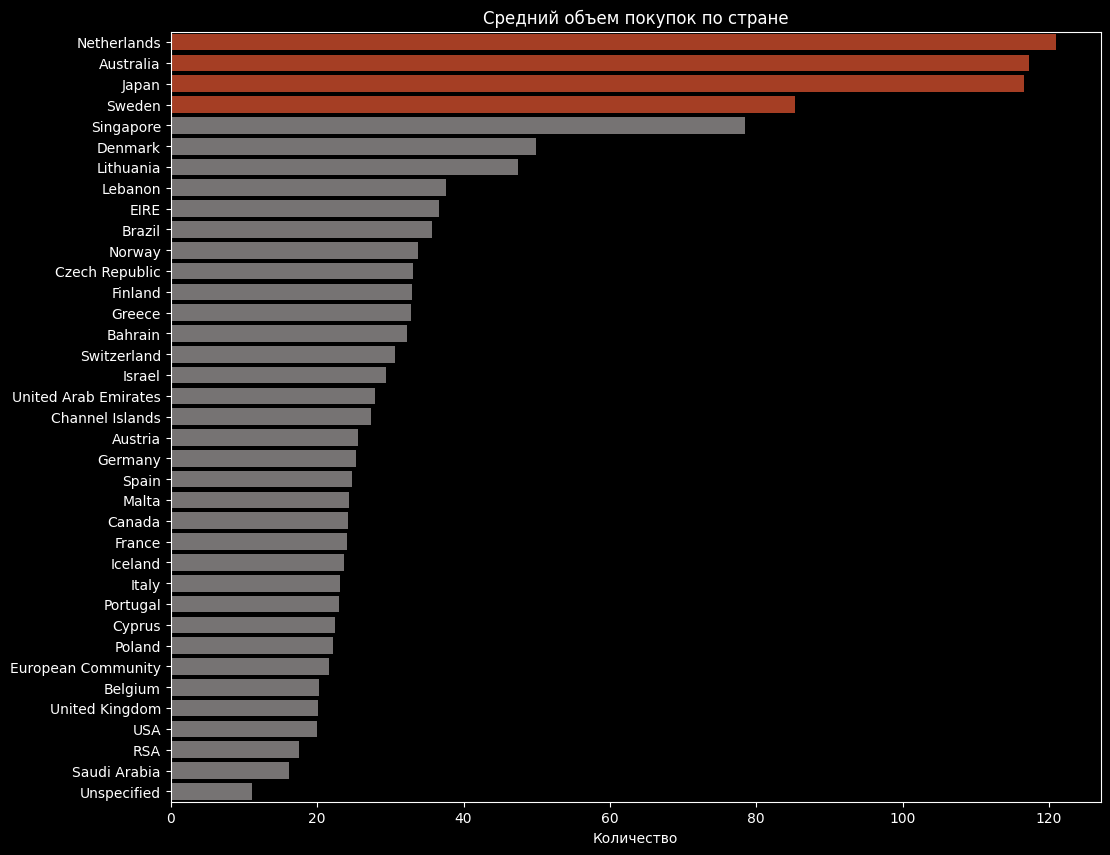

In [59]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 10))

# группируем данные по 'country' и вычисляем медианную цену 'amount_price'
ave_sales = df.groupby('country')['amount_price'].mean().sort_values(ascending = False)

# cоздаем цветовую палитру
colors = ['#eb3e13' if i < 4 else '#949191' for i in range(len(ave_sales))]

# cтроим barplot
sns.barplot(x = ave_sales.values, y = ave_sales.index, palette = colors, alpha = 0.8)

# настройка графика
plt.xlabel('Количество')
plt.ylabel('', size = 11)
plt.title('Средний объем покупок по стране')

**Средняя цена за единицу товара по стране**

Text(0.5, 1.0, 'Средняя цена за единицу товара по стране')

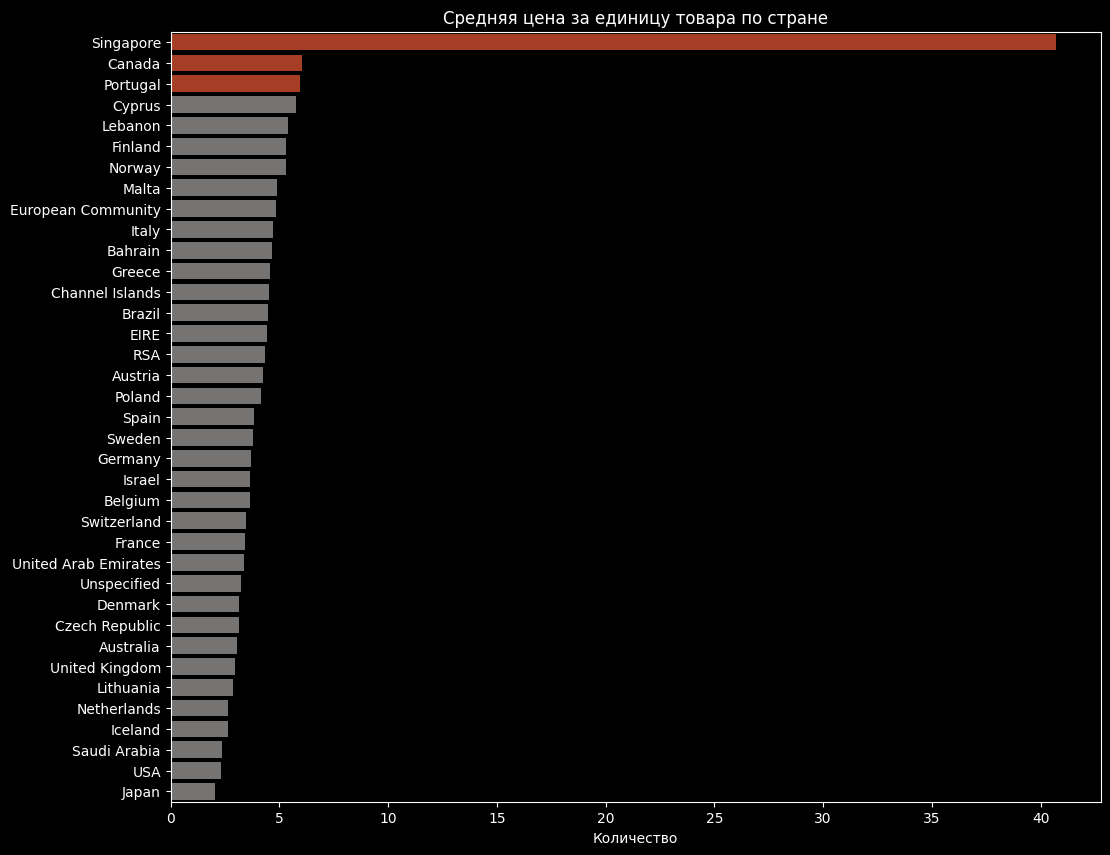

In [60]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 10))

# группируем данные по 'country' и вычисляем медианную цену 'unit_price'
avg_country_unit_price = df.groupby('country')['unit_price'].mean().sort_values(ascending = False)

# cоздаем цветовую палитру
colors = ['#eb3e13' if i < 3 else '#949191' for i in range(len(ave_sales))]

# cтроим barplot
sns.barplot(x = avg_country_unit_price.values,
            y = avg_country_unit_price.index,
            palette = colors,
            alpha = 0.8)

# настройка графика
plt.xlabel('Количество')
plt.ylabel('', size = 11)
plt.title('Средняя цена за единицу товара по стране')

### 4.6 Данные о поведении клиентов

**Частота транзакций**

Text(0.5, 1.0, 'Распределение частоты транзакций по клиентам')

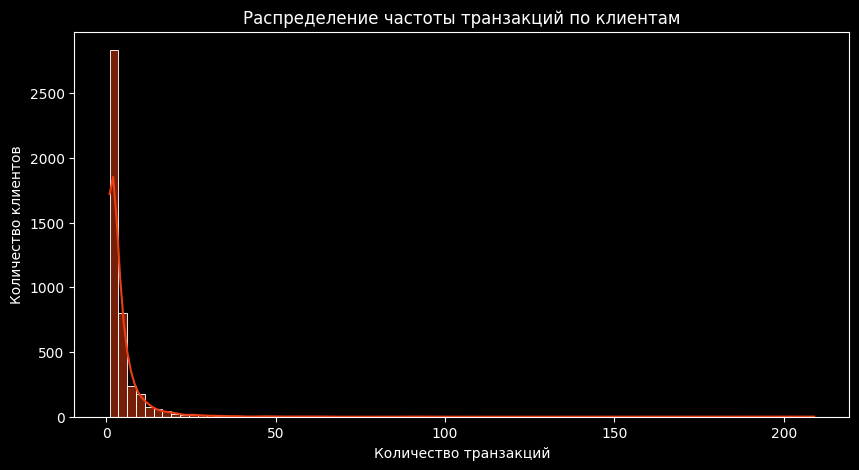

In [61]:
# устанавливаем размер фигуры
plt.figure(figsize = (10, 5))

# подсчитываем частоту транзакций для клиентов
cust_invoice = df.groupby('cust_id')['invoice_no'].nunique()

# строим histplot
sns.histplot(cust_invoice, bins = 80, kde = True, color = '#eb3e13')

# настройка графика
plt.xlabel('Количество транзакций')
plt.ylabel('Количество клиентов')
plt.title('Распределение частоты транзакций по клиентам')

In [62]:
cust_invoice_statistics = cust_invoice.describe()
print(f'Статистика частоты транзакций:\n{cust_invoice_statistics}')

Статистика частоты транзакций:
count    4337.000000
mean        4.271616
std         7.696983
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: invoice_no, dtype: float64


**Средняя сумма транзакции**

Text(0.5, 1.0, 'Распределение средней стоимости транзакции на одного клиента')

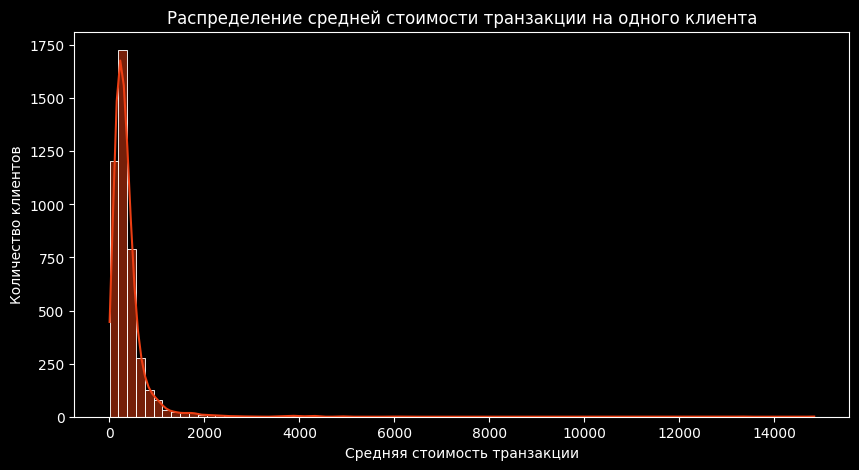

In [63]:
# устанавливаем размер фигуры
plt.figure(figsize = (10, 5))

# группируем данные по 'cust_id', 'invoice_no' и применяем агрегацию
agg_cust_invoice = df.groupby(['cust_id', 'invoice_no']).agg({'amount_price': 'sum'}).reset_index()

# подсчитываем средюю сумму транзакции для каждого клиента
mean_cust_invoice = agg_cust_invoice.groupby('cust_id')['amount_price'].mean()

# строим histplot
sns.histplot(mean_cust_invoice, bins = 80, kde = True, color = '#eb3e13')


# настройка графика
plt.xlabel('Средняя стоимость транзакции')
plt.ylabel('Количество клиентов')
plt.title('Распределение средней стоимости транзакции на одного клиента')

In [64]:
mean_cust_invoice_statistics = mean_cust_invoice.describe()
print(f'Статистика средней стоимости транзакций:\n{mean_cust_invoice_statistics}')

Статистика средней стоимости транзакций:
count     4337.000000
mean       380.338089
std        496.916403
min          2.900000
25%        177.798571
50%        291.875000
75%        427.996667
max      14844.766667
Name: amount_price, dtype: float64


### 4.7 Финансовый анализ

**Анализ доходов**

Общий доход, полученный от различных категорий товаров

Text(0.5, 1.0, 'Общий доход по категориям продуктов')

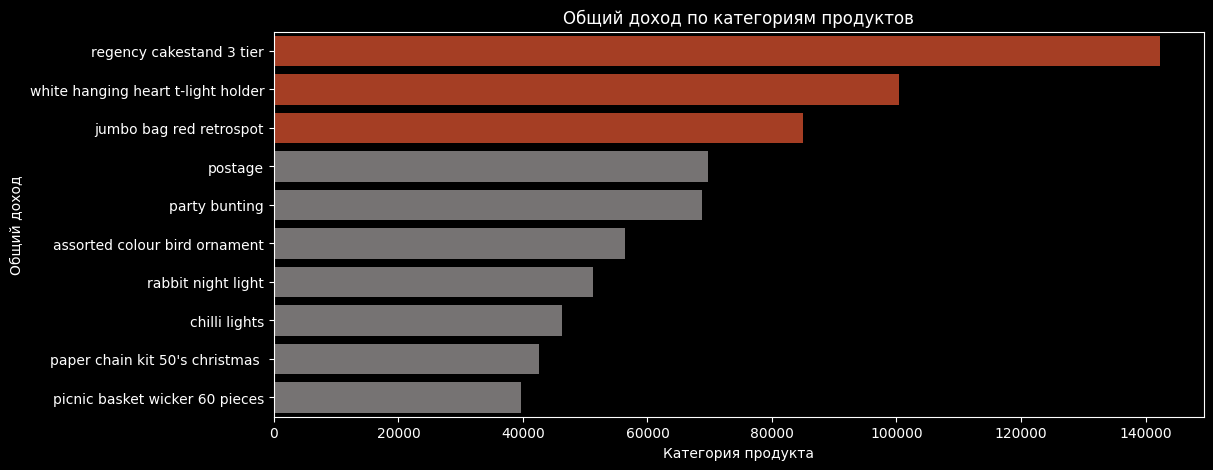

In [65]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# группируем данные по 'description' и считаем сумму по 'amount_price'
income_description = df.groupby('description')['amount_price'].sum().sort_values(ascending = False).head(10)

# cоздаем цветовую палитру
colors = ['#eb3e13' if i < 3 else '#949191' for i in range(len(income_description))]

# строим barplot
sns.barplot(x = income_description.values,
            y = income_description.index,
            palette = colors,
            orient = 'h',
            alpha = 0.8)

# настройка графика
plt.xlabel('Категория продукта')
plt.ylabel('Общий доход')
plt.title('Общий доход по категориям продуктов')

Посмотрим на результат через таблицу

In [66]:
# задаем стиль
styled_income_description = income_description.reset_index().style.background_gradient(
                                            cmap = 'binary', subset = ['amount_price'])

styled_income_description

,description,amount_price
0,regency cakestand 3 tier,142264.750000
1,white hanging heart t-light holder,100392.100000
2,jumbo bag red retrospot,85040.540000
3,postage,69661.210000
4,party bunting,68785.230000
5,assorted colour bird ornament,56413.030000
6,rabbit night light,51251.240000
7,chilli lights,46265.110000
8,paper chain kit 50's christmas,42584.130000
9,picnic basket wicker 60 pieces,39619.500000


**Ценовой анализ**

Частота покупок в разных ценовых категориях

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '0-1'),
  Text(1, 0, '1-5'),
  Text(2, 0, '5-10'),
  Text(3, 0, '10-20'),
  Text(4, 0, '20-50'),
  Text(5, 0, '50-100'),
  Text(6, 0, '100-500'),
  Text(7, 0, '500-1000'),
  Text(8, 0, '1000+')])

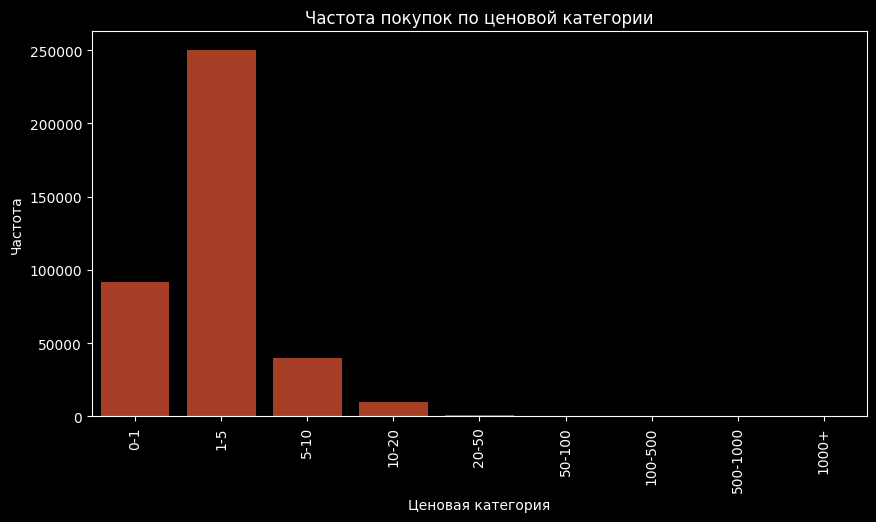

In [67]:
# устанавливаем размер фигуры
plt.figure(figsize = (10, 5))

# создание категории
bins_p = [0, 1, 5, 10, 20, 50, 100, 500, 1000, df['unit_price'].max()]
labels_p = ['0-1', '1-5', '5-10', '10-20', '20-50', '50-100', '100-500', '500-1000', '1000+']
df['category_price'] = pd.cut(df['unit_price'], bins = bins_p, labels = labels_p, right = False)

# создаем частоту покупок
freq_category_price = df['category_price'].value_counts().sort_index()


# cтроим barplot
sns.barplot(x = freq_category_price.index, y =  freq_category_price.values, color = '#eb3e13', alpha = 0.8)

# настройка графика
plt.title('Частота покупок по ценовой категории')
plt.xlabel('Ценовая категория')
plt.ylabel('Частота')
plt.xticks(rotation = 90)

Объем продаж в разных ценовых категориях

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '0-1'),
  Text(1, 0, '1-5'),
  Text(2, 0, '5-10'),
  Text(3, 0, '10-20'),
  Text(4, 0, '20-50'),
  Text(5, 0, '50-100'),
  Text(6, 0, '100-500'),
  Text(7, 0, '500-1000'),
  Text(8, 0, '1000+')])

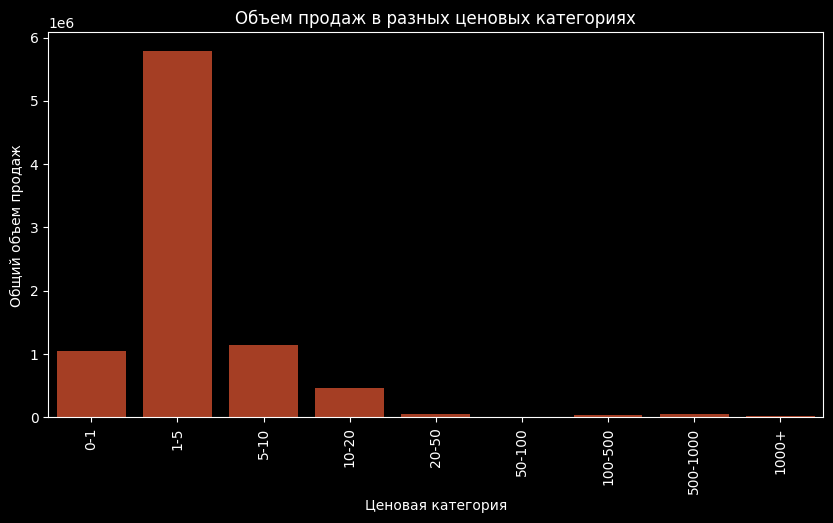

In [68]:
# устанавливаем размер фигуры
plt.figure(figsize = (10, 5))

# создаем объем продаж
volume_amount_price = df.groupby('category_price')['amount_price'].sum().sort_index()

# cтроим barplot
sns.barplot(x = volume_amount_price.index, y = volume_amount_price.values, color = '#eb3e13', alpha = 0.8)

# настройка графика
plt.title('Объем продаж в разных ценовых категориях')
plt.xlabel('Ценовая категория')
plt.ylabel('Общий объем продаж')
plt.xticks(rotation = 90)

Посмотрим на результаты через таблицы:

In [69]:
# строим таблицу
freq_category_price = df['category_price'].value_counts().sort_values(ascending = False).reset_index()
freq_category_price.rename(columns={'index': 'category_price', 'category_price': 'frequency'}, inplace=True)

# задаем стиль
styled_freq_category_price = freq_category_price.style.background_gradient(cmap = 'binary', subset = ['frequency'])

styled_freq_category_price

,category_price,frequency
0,1-5,250275
1,0-1,91670
2,5-10,39933
3,10-20,9689
4,20-50,747
5,50-100,187
6,100-500,148
7,500-1000,20
8,1000+,15


In [70]:
# строим таблицу
volume_amount_price = df.groupby('category_price')['amount_price'].sum().sort_values(ascending = False).reset_index()

# задаем стиль
styled_volume_amount_price = volume_amount_price.style.background_gradient(cmap = 'binary', subset = ['amount_price'])

styled_volume_amount_price

,category_price,amount_price
0,1-5,5790114.460000
1,5-10,1138473.170000
2,0-1,1044442.154000
3,10-20,458123.930000
4,20-50,60574.800000
5,500-1000,51904.960000
6,100-500,33734.720000
7,1000+,24599.680000
8,50-100,13517.680000


**Какие товары лучше всего продаются для каждой страны**

In [71]:
# группируем данные по 'country', 'description' и считаем сумму по 'amount_price'
sum_amount_price_products = df.groupby(['country', 'description'])['amount_price'].sum().reset_index()

# найдем индексы строк с максимальной ценой в каждой стране
idx = sum_amount_price_products .groupby('country')['amount_price'].idxmax()

# создаем df из найденных индексов и соответствующих стран
product_top = pd.DataFrame({'country': sum_amount_price_products.loc[idx, 'country'].values,
                                    'product_top': sum_amount_price_products .loc[idx, 'description'].values})

# группируем данные по 'country', и определяем максимальную цену по 'amount_price'
max_sales = sum_amount_price_products .groupby('country')['amount_price'].max().values.tolist()

# создаем колонку 'sales'
product_top['sales'] = max_sales

# расчитываем общую сумму продаж по стране
amount_sales = sum_amount_price_products .groupby('country')['amount_price'].sum().values.tolist()

# создаем колонку 'country_amount_price'
product_top['country_amount_price'] = amount_sales

# расчитываем % продажи по стране
product_top['% of country sales'] = product_top['sales']/product_top['country_amount_price']

In [72]:
# задаем стиль
product_top_styled = product_top.style.background_gradient(
                      cmap=sns.color_palette('binary', as_cmap = True),
                      subset=['% of country sales']).format({'% of country sales': '{:.2%}',
                                                             'sales': '{:,.0f}',
                                                             'country_amount_price': '{:,.0f}'})
product_top_styled

,country,product_top,sales,country_amount_price,% of country sales
0,Australia,rabbit night light,"3,376","138,454",2.44%
1,Austria,postage,"1,456","10,199",14.28%
2,Bahrain,ice cream sundae lip gloss,120,548,21.88%
3,Belgium,postage,"4,269","41,196",10.36%
4,Brazil,regency cakestand 3 tier,175,"1,144",15.32%
5,Canada,postage,551,"3,666",15.03%
6,Channel Islands,regency cakestand 3 tier,518,"20,441",2.53%
7,Cyprus,rustic seventeen drawer sideboard,580,"13,503",4.30%
8,Czech Republic,round snack boxes set of4 woodland,71,827,8.56%
9,Denmark,postage,744,"18,955",3.93%


## 5.Когортного анализа

Когортный анализ включает в себя группировку клиентов на основе общих характеристик или поведения, а затем анализ их поведения с течением времени.

**Цель когортного анализа** — понять, как различные группы клиентов ведут себя или реагируют на определенные события или изменения. Когорты обычно определяются по общему атрибуту или характеристике, например месяцу привлечения клиентов или конкретной маркетинговой кампании. Отслеживая и сравнивая поведение различных когорт, компании могут получить представление об удержании клиентов, вовлеченности и других ключевых показателях.

Когортный анализ особенно полезен при анализе моделей роста пользователей продуктов. С точки зрения продукта, когорта может представлять собой группу людей с одинаковой датой регистрации, одинаковым месяцем/датой начала использования или одним и тем же источником трафика.

**Когортный анализ** — это аналитический метод, с помощью которого эти группы можно отслеживать с течением времени для выявления ключевых идей. Этот анализ в дальнейшем можно использовать для сегментации клиентов и отслеживания таких показателей, как удержание, отток и пожизненная ценность.

Для организаций электронной коммерции когортный анализ — это уникальная возможность выяснить, какие клиенты наиболее ценны для их бизнеса. проведя когортный анализ, вы можете получить следующие ответы на следующие вопросы:

- Насколько эффективной была проведенная маркетинговая кампания в конкретный период времени?
- Сработала ли стратегия, направленная на повышение коэффициента конверсии клиентов?
- Должен ли я больше сосредоточиться на удержании, а не на привлечении новых клиентов?
- Эффективны ли мои стратегии по работе с клиентами?
- Какие маркетинговые каналы приносят мне наилучшие результаты?
- Есть ли сезонность в поведении клиентов?
- Наряду с различными показателями производительности/метриками для вашей организации.

Поскольку мы будем проводить когортный анализ на основе записей транзакций клиентов, столбцы, с которыми мы будем иметь дело в основном:

- Данные счета
- Пользовательский ИД
- Цена
- Количество

Для создания когортной диаграммы коэффициента удержания будут выполнены следующие шаги:

- Извлечение месяца из столбца InvioceDate
- Назначение когорты для каждой транзакции
- Назначение индекса когорты каждой транзакции
- Подсчет количества уникальных клиентов в каждой группе (ChortDate,Index)
- Создание когортной таблицы для коэффициента удержания
- Создание когортной диаграммы с использованием когортной таблицы


In [73]:
# создаем копию
cohort = df.copy()

In [74]:
# выбираме нужные столбцы
cohort = df.loc[:, ['invoice_date', 'cust_id',	'amount_price']]
cohort.head(2)

,invoice_date,cust_id,amount_price
0,2010-01-12 08:26:00,17850,15.30
1,2010-01-12 08:26:00,17850,20.34


Наш набор данных охватывает период в два года (2010 – 2011 гг.). Поскольку 2010 г. не дает нам полной картины, объемы транзакций очень маленькие, удаляем его. Оставим полный год с декабря 2010 по декабрь 2011 итого полный год.

In [75]:
# отфильтрую датасет по периоду который нас интересует
cohort = cohort.query('invoice_date >= "2010-12-01" & invoice_date <= "2011-12-31"')
cohort.head(5)

,invoice_date,cust_id,amount_price
15542,2010-12-12 10:11:00,17243,13.20
15543,2010-12-12 10:11:00,17243,4.25
15544,2010-12-12 10:11:00,17243,14.85
15545,2010-12-12 10:11:00,17243,23.25
15546,2010-12-12 10:11:00,17243,15.00


**Для когортного анализа нам нужно создать несколько меток:**

- **Месяц счета(invoice_month):** строковое представление года и месяца одной транзакции/счета.
- **Месяц когорты(cohort_month):**  строковое представление года и месяца первой покупки клиента. Эта метка является общей для всех счетов-фактур конкретного клиента.
- **Когортный период(cohort_period):**  целочисленное представление стадии клиента на протяжении его «жизни». Число представляет собой количество месяцев, прошедших с момента первой покупки.

In [76]:
# создаем первую переменную 'invoice_month'
# извлечем только год-месяц из даты счета, и день будет автоматически равен 1
cohort['invoice_month'] = cohort['invoice_date'].dt.strftime('%Y-%m')

In [77]:
# преобразует колонку из текста в дату
cohort['invoice_month'] = pd.to_datetime(cohort['invoice_month'])

In [78]:
# создаем вторую переменную 'cohort_month' использую функцию transform
# получаем дату первой покупки для каждого покупателя
cohort['cohort_month'] = cohort.groupby('cust_id')['invoice_month'].transform('min')

In [79]:
cohort['cohort_month'] = pd.to_datetime(cohort['cohort_month'])

In [80]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377143 entries, 15542 to 392684
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   invoice_date   377143 non-null  datetime64[ns]
 1   cust_id        377143 non-null  int64         
 2   amount_price   377143 non-null  float64       
 3   invoice_month  377143 non-null  datetime64[ns]
 4   cohort_month   377143 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 17.3 MB


In [81]:
'''созданем третью переменную 'cohort_period'для этого мы создаем функцию,
которая вычисляет количество месяцев между датой первой покупки и датой выставления счета'''

def month_dd(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)

cohort['cohort_period'] = month_dd(cohort['invoice_month'], cohort['cohort_month'])

In [82]:
cohort.sample(5)

,invoice_date,cust_id,amount_price,invoice_month,cohort_month,cohort_period
193308,2011-07-27 13:14:00,12523,10.95,2011-07-01,2011-01-01,6
23685,2010-12-19 14:24:00,14911,34.00,2010-12-01,2010-12-01,0
218709,2011-08-24 12:51:00,15769,358.00,2011-08-01,2011-02-01,6
33110,2011-12-01 14:57:00,14040,15.90,2011-12-01,2011-01-01,11
98977,2011-07-04 13:16:00,16469,3.90,2011-07-01,2011-07-01,0


### 5.1 Когортный анализ по количеству уникальных клиентов

In [83]:
cohort_cust = cohort.pivot_table(index = 'cohort_month', columns = 'cohort_period', values = 'cust_id', aggfunc = 'nunique')
cohort_cust

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12-01,431.0,189.0,164.0,187.0,179.0,199.0,193.0,189.0,174.0,197.0,176.0,225.0,77.0
2011-01-01,685.0,167.0,194.0,185.0,213.0,229.0,235.0,182.0,232.0,229.0,271.0,101.0,NaN
2011-02-01,475.0,94.0,94.0,119.0,118.0,122.0,113.0,128.0,128.0,150.0,42.0,NaN,NaN
2011-03-01,468.0,83.0,104.0,93.0,105.0,94.0,104.0,112.0,125.0,30.0,NaN,NaN,NaN
2011-04-01,349.0,74.0,64.0,71.0,69.0,67.0,94.0,83.0,14.0,NaN,NaN,NaN,NaN
2011-05-01,299.0,52.0,59.0,48.0,68.0,51.0,79.0,17.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,284.0,46.0,39.0,47.0,50.0,71.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,250.0,51.0,46.0,46.0,63.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,185.0,33.0,41.0,51.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Наблюдения:**

- В приведенной выше таблице показано удержание и привлечение клиентов.
- Когорта 1 и когортные периоды:
  - Когорты определяются по месяцу первоначальной покупки, 2010-12, 2011-01 и т. д. Периоды когорт (столбцы) представляют собой количество месяцев с момента первоначальной покупки.
- По вертикали, т.е. первый столбец «0» показывает, сколько новых клиентов компания приобрела за определенный месяц. Например:
  -  431 — это количество клиентов, приобретенных в декабре 2010 г. Первая когорта.
  - 685 — это количество клиентов (отличных от предыдущего месяца), приобретенных в январе 2011 г. и так далее. Вторая когорта.
- По горизонтали, т. е. в первой строке указано количество клиентов, которые продолжают участвовать в бизнесе с момента их первой покупки, т. е. декабря 2010 г.                    
  Например:
  - 189 — это количество клиентов из 431, которые продолжают совершать покупки через месяц после первой покупки,
  - 164 — это количество клиентов, которые продолжают покупать через два месяца после первой покупки, и так далее.
- По мере продвижения вниз по каждой когорте наблюдаем тенденцию снижения. Это указывает на то, что количество клиентов, совершающих покупки, со временем уменьшается. Например, в 1 когорте 2010–2012 количество клиентов через 12 месяцев уменьшается с 431 до 225.

**Retention Rate**

Таблицы удержания показывают группу людей, которые впервые посетили сайт или использовали приложение в течение определенного периода времени. Они также демонстрируют постепенное снижение или снижение активности с течением времени для этой конкретной группы (когорты).

Маркетологи могут использовать таблицы удержания для анализа качества пользователей, привлеченных маркетинговой кампанией, и сравнения его с другими источниками трафика.

In [84]:
cohort_raz = cohort_cust.iloc[:,0]

# axis=0, чтобы обеспечить разделение по оси строки.
retentionn = cohort_cust.divide(cohort_raz, axis = 0)

retentionn.index = pd.to_datetime(retentionn.index).date

# показываем в процентах
retentionn.round(3) * 100

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-01,100.0,43.9,38.1,43.4,41.5,46.2,44.8,43.9,40.4,45.7,40.8,52.2,17.9
2011-01-01,100.0,24.4,28.3,27.0,31.1,33.4,34.3,26.6,33.9,33.4,39.6,14.7,NaN
2011-02-01,100.0,19.8,19.8,25.1,24.8,25.7,23.8,26.9,26.9,31.6,8.8,NaN,NaN
2011-03-01,100.0,17.7,22.2,19.9,22.4,20.1,22.2,23.9,26.7,6.4,NaN,NaN,NaN
2011-04-01,100.0,21.2,18.3,20.3,19.8,19.2,26.9,23.8,4.0,NaN,NaN,NaN,NaN
2011-05-01,100.0,17.4,19.7,16.1,22.7,17.1,26.4,5.7,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,16.2,13.7,16.5,17.6,25.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.4,18.4,18.4,25.2,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,17.8,22.2,27.6,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,14.7,19.9,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим тепловую карту этой таблицы.

Text(0.5, 80.7222222222222, 'Когортный период')

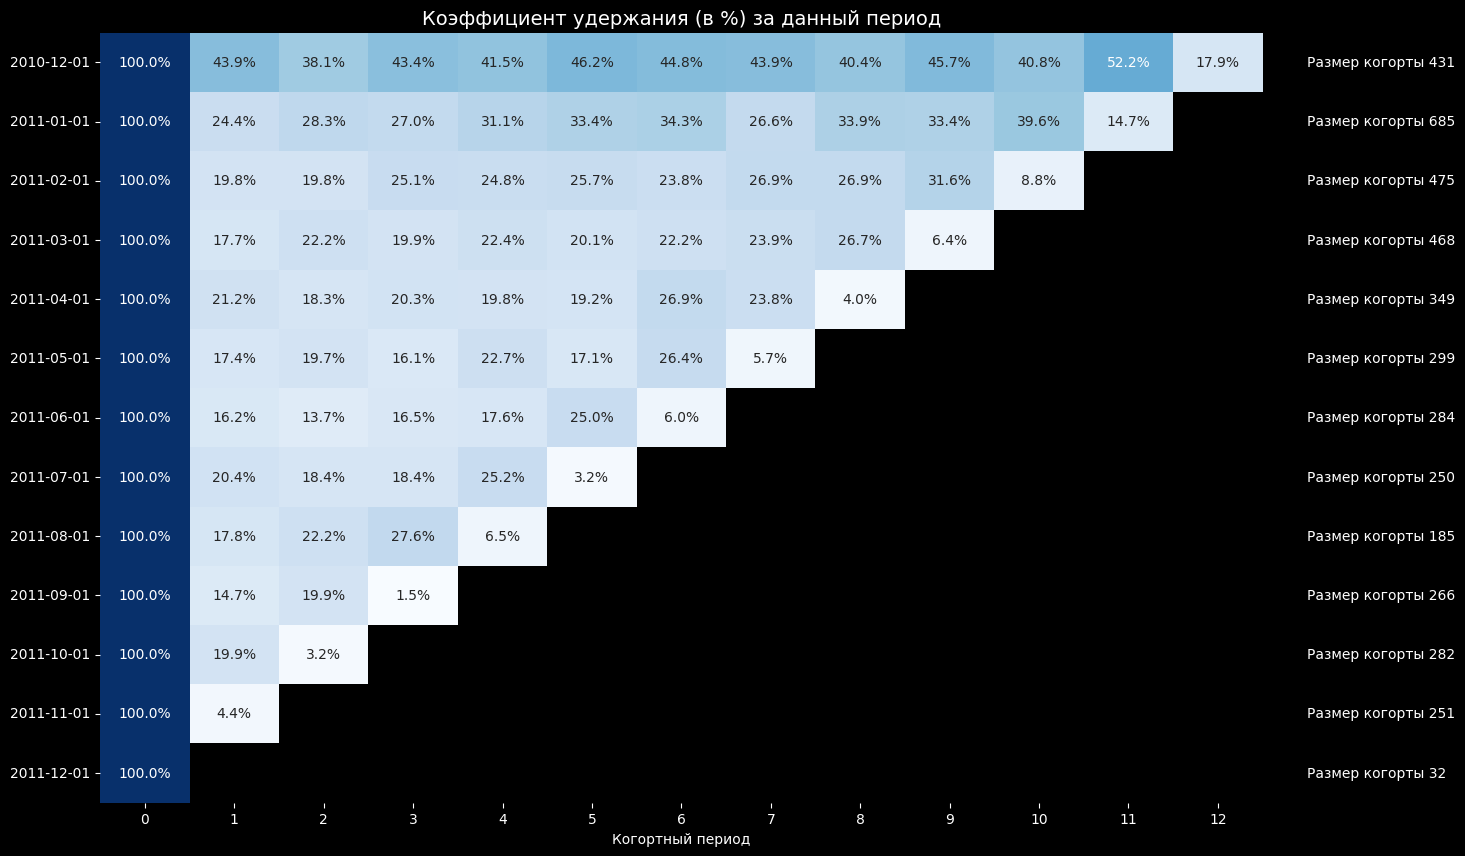

In [85]:
# устанавливаем размер фигуры
plt.figure(figsize = (15, 10))

# cтроим heatmap
sns.heatmap(data = retentionn, annot = True, fmt = '.1%', cmap = 'Blues', cbar = False)

# Добавим размер когорты в виде аннотаций
for i in range(len(cohort_raz)):
    plt.text(len(cohort_raz) + 0.5, i + 0.5,
             f'Размер когорты {int(cohort_raz.iloc[i])}', va = 'center', ha = 'left')

# настройка графика
plt.title('Коэффициент удержания (в %) за данный период', size = 14)
plt.xlabel('Когортный период')

Выводы:
- Приведенная выше таблица представляет собой не что иное, как отображение значения в процентах.
- Мы можем видеть, как с течением времени клиент взаимодействует с бизнесом.
- Например:
  - В январе 2011 года компания приобрела несколько новых клиентов, но через месяц только 24.4% остались или сказали, что вернутся снова.
  - Затем это число вырастет до 28.3%, что означает, что некоторые клиенты возвращаются и совершают покупки снова, и причиной может быть приглашение/предложения, отправленные этой группе клиентов. Первая когорта (2010–2012 гг.), кажется, является исключением и демонстрирует на удивление хорошие результаты по сравнению с остальными.
  - Через год после первой покупки сохраняется 52.2%. Это может быть группа преданных клиентов, которые впервые присоединились к платформе на основе уже существующих связей с ритейлером. Однако, исходя только из данных, это очень сложно точно объяснить.
- По всей матрице мы можем видеть колебания удержания с течением времени. Это может быть вызвано особенностями бизнеса, когда клиенты совершают периодические покупки, за которыми следуют периоды бездействия.

### 5.2 Когортный анализ по средней сумме продаж

In [86]:
amount_price_cohort = cohort.pivot_table(index = 'cohort_month', columns = 'cohort_period',
                                          values = 'amount_price', aggfunc = 'mean').round(2)
amount_price_cohort

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12-01,22.34,25.18,23.95,27.13,24.69,26.91,21.75,26.00,20.98,26.01,28.04,24.81,30.13
2011-01-01,19.28,24.78,27.15,23.92,28.45,26.10,27.48,25.99,32.06,20.93,22.01,18.40,NaN
2011-02-01,19.01,31.93,30.30,27.13,33.57,35.12,24.14,37.39,22.04,19.61,16.58,NaN,NaN
2011-03-01,17.15,17.89,19.47,15.03,18.30,16.40,19.43,18.79,17.55,19.73,NaN,NaN,NaN
2011-04-01,18.28,19.96,19.31,11.58,16.02,18.68,14.81,24.28,33.03,NaN,NaN,NaN,NaN
2011-05-01,17.91,15.34,21.98,21.34,16.31,16.29,15.96,20.58,NaN,NaN,NaN,NaN,NaN
2011-06-01,14.47,13.28,14.62,14.91,15.71,15.45,15.11,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,17.33,18.61,13.66,13.57,11.03,13.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,17.94,13.18,14.54,14.00,18.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Построим тепловую карту это таблицы**

Text(0.5, 80.7222222222222, 'Когортный период')

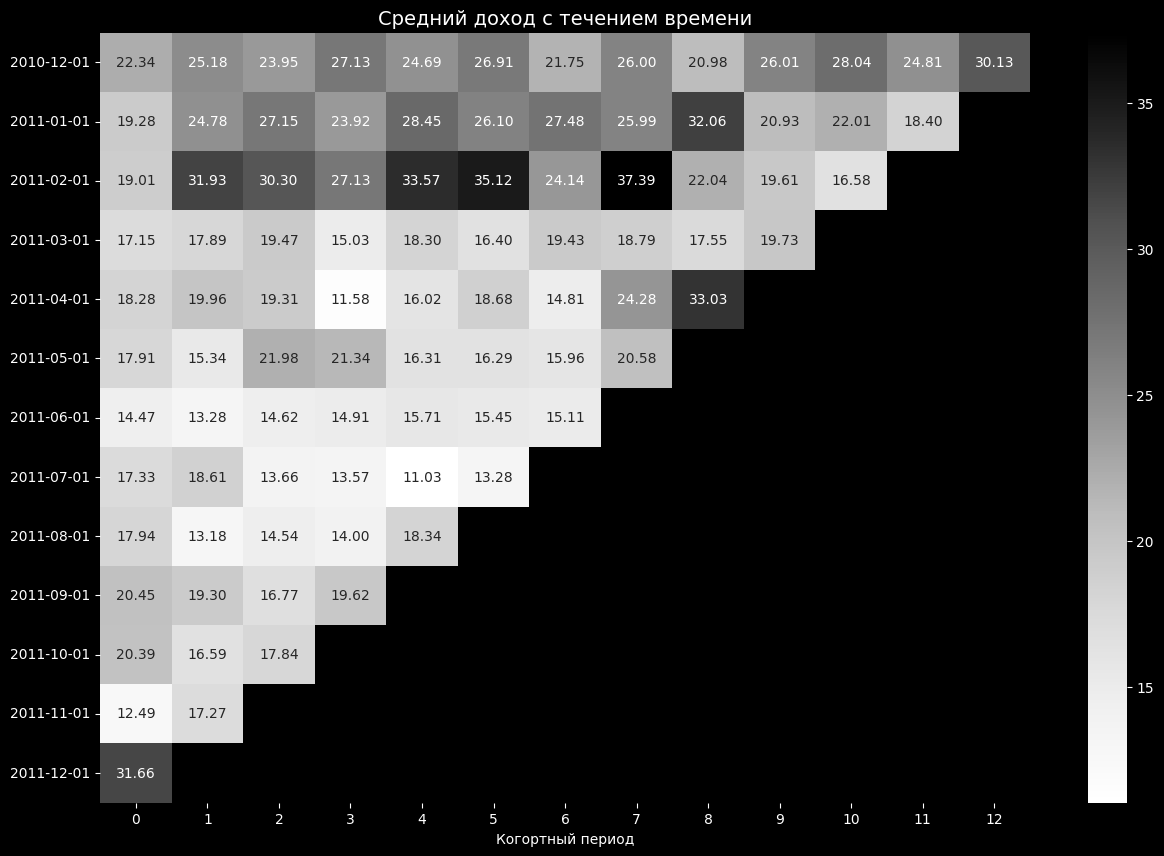

In [88]:
# устанавливаем размер фигуры
plt.figure(figsize = (15, 10))

amount_price_cohort.index = pd.to_datetime(amount_price_cohort.index).date

# строим heatmap
sns.heatmap(data = amount_price_cohort, annot = True, fmt = '.2f', cmap = 'Greys')

# настройка графика
plt.title('Средний доход с течением времени', size = 14)
plt.xlabel('Когортный период')

**Выводы:**
- В приведенной выше таблице показана средняя сумма, потраченная группой клиентов за определенный период времени.
- Возьмем группу клиентов (3 Когорта) в феврале 2011 года они первоначально потратили 19.01, но через месяц они потратили на 31.93 больше, чем в предыдущий, затем через два месяца они потратили 30.30. В июле они вышли на 37.39 значительный прирост и  так далее.
- В случае с удержанием клиентов, можно наблюдать закономерности снижения и колебаний доходов с течением времени. По мере развития когортных периодов доход имеет тенденцию меняться: некоторые периоды приносят более высокий доход, чем другие.
- Разные когорты демонстрируют разную структуру доходов. Например, когорта 2010–12 (1 Когорта) начинается с высокого дохода в первый период когорты, что может указывать на сильную первоначальную вовлеченность. Однако получение дохода имеет тенденцию к снижению в последующие периоды для большинства когорт.
- Анализ тенденций доходов по когортам и когортным периодам может дать представление об эффективности маркетинговых кампаний, запусков продуктов или инициатив по привлечению клиентов.
- Когорта 2010–12 (1 Когорта) демонстрирует относительно стабильное получение доходов даже после нескольких периодов когорты, что позволяет предположить, что это группа клиентов с долгосрочным взаимодействием и более высокими расходами.

### 5.3 Retention (Удержание всех клиентов)

In [89]:
# расчет удержания для всех клиентов
customer = cohort.groupby('cohort_month')['cust_id'].nunique().values
customers = customer.cumsum()
customers = customers[::-1]
customers

array([4257, 4225, 3974, 3692, 3426, 3241, 2991, 2707, 2408, 2059, 1591,
       1116,  431])

In [90]:
# группируем по cohort_period
customer_month = cohort.groupby('cohort_period')['cust_id'].nunique()
customer_month

cohort_period
0     4257
1      895
2      867
3      851
4      877
5      841
6      835
7      711
8      673
9      606
10     489
11     326
12      77
Name: cust_id, dtype: int64

Text(0.5, 1.0, 'Ежемесячные показатели удержания для всех клиентов')

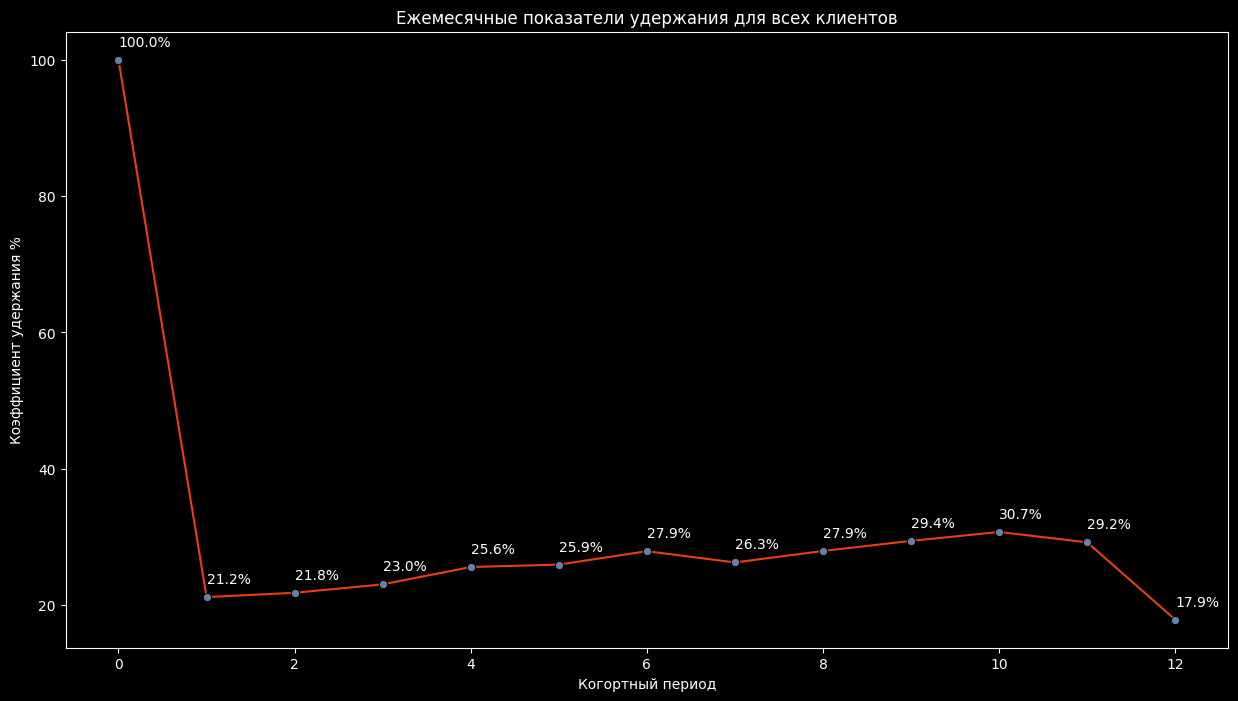

In [91]:
# устанавливаем размер фигуры
plt.figure(figsize = (15, 8))

# определяемся по х и по у
x = customer_month.index
y = 100 * (customer_month / customers)

# строим lineplot
sns.lineplot(x = x, y = y, color = '#eb3e13', marker = 'o', markerfacecolor = '#6781a8', markeredgecolor = '#000000')

# подписываем значения
for x, y in zip(x, y):
    plt.text(x, y + 2, s = str(round(y, 1)) + '%')

# настройка графика
plt.xlabel('Когортный период')
plt.ylabel('Коэффициент удержания %')
plt.title('Ежемесячные показатели удержания для всех клиентов')

Выводы:
- Удержание клиентов — очень полезный показатель, позволяющий понять, сколько из всех клиентов все еще активны. Удержание показывает процент активных клиентов по сравнению с общим количеством клиентов.
- Уровень удержания в последние месяцы года значительно возрос. Вероятно, это связано с различными праздниками. В конце года много особенных дней.

## 6.RFM - Анализ

**RFM-сегментация**

RFM-сегментация — это метод оценки, используемый для лучшей количественной оценки поведения клиентов. Во время маркетинговых кампаний не следует прикладывать одинаковые усилия ко всем клиентам. Сегментация прямого маркетинга позволяет группировать клиентов по разным сегментам и соответствующим образом анализировать их прибыльность.

Метрики RFM тесно связаны с пожизненной ценностью клиента, поскольку частота и денежная стоимость напрямую влияют на CLV, а новизна влияет на **удержание.**

- **Recency (R)** - Недавность: время с момента последнего заказа.
- **Frequency (F)** - Частота: общее количество транзакций.
- **Monetary (M)** - Денежный: общая стоимость транзакций.

Эти показатели очень важны для понимания поведения клиентов:

- Чем позже совершена покупка, тем активнее клиент реагирует на рекламные акции.
- Чем чаще клиенты покупают, тем больше они вовлечены

Понимая эти сегменты, компании могут разрабатывать целевые маркетинговые кампании, рекламные акции и персонализированный опыт для удовлетворения конкретных потребностей и предпочтений каждой группы. Модель RFM — ценный инструмент управления взаимоотношениями с клиентами, помогающий компаниям оптимизировать свои маркетинговые стратегии и повысить удовлетворенность клиентов.

### 6.1 Создание таблицы RFM

In [92]:
# создаем копию
rfm = df.copy()

In [93]:
# выбираем нужные столбцы
rfm = df.loc[:, ['invoice_date', 'invoice_no', 'cust_id',	'amount_price']]
rfm.head(2)

,invoice_date,invoice_no,cust_id,amount_price
0,2010-01-12 08:26:00,536365,17850,15.30
1,2010-01-12 08:26:00,536365,17850,20.34


In [94]:
# отфильтрую датасет по периоду который нас интересует
rfm  = rfm.query('invoice_date >= "2010-12-01" & invoice_date <= "2011-12-31"')
rfm.head(5)

,invoice_date,invoice_no,cust_id,amount_price
15542,2010-12-12 10:11:00,538365,17243,13.20
15543,2010-12-12 10:11:00,538365,17243,4.25
15544,2010-12-12 10:11:00,538365,17243,14.85
15545,2010-12-12 10:11:00,538365,17243,23.25
15546,2010-12-12 10:11:00,538365,17243,15.00


In [95]:
# максимальная дата и минимальная дата в нашей таблицы
print('Минимальная дата: {} \nМаксимальная дата: {}'.format(rfm.invoice_date.min(), rfm.invoice_date.max()))

Минимальная дата: 2010-12-12 10:11:00 
Максимальная дата: 2011-12-10 17:19:00


In [97]:
# определяем дату, которая на один день больше самой поздней даты в столбце invoice_date
final_day = rfm.invoice_date.max() + dt.timedelta(days = 1)
final_day

Timestamp('2011-12-11 17:19:00')

In [98]:
''' Группирует данные по (cust_id) и применяем агрегирование к выбранным столбцам.
- 'invoice_date': - для столбца invoice_date (дата покупки) вычисляется разница в днях между последней датой покупки
(x.max()) и финальным днем (final_day), который должен быть определен ранее в вашем коде.
Результат преобразовывается в дни с помощью .days.

- 'invoice_no': 'nunique' - вычисляется количество количество уникальных номеров счетов для каждого клиента.

- 'amount_price': 'sum' -  вычисляется сумма общую сумму покупок для каждого клиента.'''

rfm_tab = df.groupby('cust_id').agg({'invoice_date': lambda x: (final_day - x.max()).days,
                                         'invoice_no': 'nunique',
                                         'amount_price': 'sum'})
# изменяем столбцы
rfm_tab.rename(columns = {'invoice_date': 'recency', 'invoice_no': 'frequency',
                            'amount_price': 'monetary'}, inplace = True)

rfm_tab.head()

,recency,frequency,monetary
cust_id,,,
12347,41,7,4310.00
12348,77,4,1797.24
12349,20,1,1757.55
12350,312,1,334.40
12352,74,8,2506.04


In [99]:
''' 'r_labels' - генерирует последовательность чисел от 5 до 0 (не включая 0) с шагом -1.
Это означает, что числа будут уменьшаться на 1 при каждом шаге.

fm_labels - это переменная, которая генерирует последовательность чисел от 1 до 5.'''

r_labels = range(5, 0, -1)
fm_labels = range(1, 6)

''' создаем колонки 'r' 'f' 'm':
rfm_tab['frequency'].rank(method = 'first') - это функция, которая ранжирует значения в столбце frequency с использованием метода 'first',
что означает, что если есть повторяющиеся значения, они получают одинаковый ранг, а ранги следуют за ним.

pd.qcut -  разделяет ранжированные значения на 5 равных интервалов и назначает им метки из списка.

'recency' и 'monetary' - разделяем значения в столбце 'recency' и 'monetary' на 5 равных интервалов (квартилей)
и назначает им метки из списка r_labels и fm_labels'''

rfm_tab['r'] = pd.qcut(rfm_tab['recency'], 5, labels = r_labels)
rfm_tab['f'] = pd.qcut(rfm_tab['frequency'].rank(method = 'first'), 5, labels = fm_labels)
rfm_tab['m'] = pd.qcut(rfm_tab['monetary'], 5, labels = fm_labels)

rfm_tab.head(7)

,recency,frequency,monetary,r,f,m
cust_id,,,,,,
12347,41,7,4310.00,4,5,5
12348,77,4,1797.24,3,4,4
12349,20,1,1757.55,4,1,4
12350,312,1,334.40,1,1,2
12352,74,8,2506.04,3,5,5
12353,205,1,89.00,1,1,1
12354,234,1,1079.40,1,1,4


In [100]:
# создаме новый столбец 'rfm_segment'
rfm_tab['rfm_segment'] = rfm_tab['r'].astype(str) + rfm_tab['f'].astype(str) + rfm_tab['m'].astype(str)

# создаме новый столбец 'rfm_score'
rfm_tab['rfm_score'] = rfm_tab[['r', 'f', 'm']].sum(axis = 1)

rfm_tab.head(7)

,recency,frequency,monetary,r,f,m,rfm_segment,rfm_score
cust_id,,,,,,,,
12347,41,7,4310.00,4,5,5,455,14
12348,77,4,1797.24,3,4,4,344,11
12349,20,1,1757.55,4,1,4,414,9
12350,312,1,334.40,1,1,2,112,4
12352,74,8,2506.04,3,5,5,355,13
12353,205,1,89.00,1,1,1,111,3
12354,234,1,1079.40,1,1,4,114,6


Далее нужно дать названия нашим сегментам, всего их может быть 64, однако их можно сократить для ясности. Ниже эти сегменты:

**RFM-сегменты** которые мы будем использовать:

- **Чемпионы (Champions):** очень ценные клиенты, которые делают частые покупки и тратят больше всего, лояльны к компании.

- **Постоянные клиенты (Loyal customers):** клиенты, которые постоянно совершают покупки и лояльны к компании.

- **Потенциальный лояльный клиент (Potential loyalist):** клиенты, которые совершали покупки в прошлом и демонстрируют потенциал лояльности.

- **Недавние клиенты (Recent customers):** недавно приобретенные клиенты, находящиеся на ранних стадиях отношений с компанией.

- **Многообещающие (Promising):**  клиенты, совершившие несколько покупок и демонстрирующие потенциал лояльности.

- **Требует внимания (Needs attention):** клиенты, которые не являются частыми покупателями и нуждаются во внимании, чтобы поддерживать интерес.

- **Собираются спать (About to sleep):**  клиенты, которые раньше совершали покупки, но давно этого не делали и, скорее всего, станут неактивными.

- **В зоне риска (At risk):** клиенты, которые рискуют стать неактивными. Раньше покупали, но частота снизилась.

- **Их невозможно потерять (Can’t lose them):** часто покупали, но давно не возвращались.

- **Спящий режим (Hibernating):** последняя покупка была давно, и количество заказов было небольшим. Они неактивны.

Как сегментировать своих клиентов, взял из этого источника:

https://futurice.com/blog/know-your-customers-with-rfm


In [101]:
# создаем словарь который сопоставляет регулярные выражения с названиями сегментов.
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

# создаем новый столбец
rfm_tab['segment_n'] = rfm_tab['r'].astype(str) + rfm_tab['f'].astype(str)

# выполняем замену значений в столбце segment_n используя словарь segt_map и флаг regex=True, используя регулярки.
rfm_tab['segment'] = rfm_tab['segment_n'].replace(segt_map, regex = True)

rfm_tab.sample(7)

,recency,frequency,monetary,r,f,m,rfm_segment,rfm_score,segment_n,segment
cust_id,,,,,,,,,,
13094,23,12,1927.32,4,5,4,454,13,45,Loyal Customers
15051,4,3,1383.36,5,3,4,534,12,53,Potential Loyalists
16236,80,1,432.20,3,2,2,322,7,32,About To Sleep
13799,118,2,688.86,2,2,3,223,7,22,Hibernating
15052,321,1,207.73,1,1,1,111,3,11,Hibernating
16558,23,20,8338.49,4,5,5,455,14,45,Loyal Customers
13338,218,1,487.02,1,1,3,113,5,11,Hibernating


Теперь мы знали сегменты наших клиентов и можем выбирать, как нацеливаться на каждый сегмент или работать с ним.


### 6.2 Визуализация RFM

**Карта сегментации**

In [102]:
# создаем словарь
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal Customers": [3, 5, 0.4, 0.8],
                   "Cannot lose them": [4, 5, 0, 0.4],
                   "At-Risk": [2, 4, 0, 0.4],
                   "Hibernating": [0, 2, 0, 0.4],
                   "About To Sleep": [0, 2, 0.4, 0.6],
                   "Promising": [0, 1, 0.6, 0.8],
                   "New Customers": [0, 1, 0.8, 1],
                   "Potential Loyalists": [1, 3, 0.6, 1],
                   "Need Attention": [2, 3, 0.4, 0.6]}

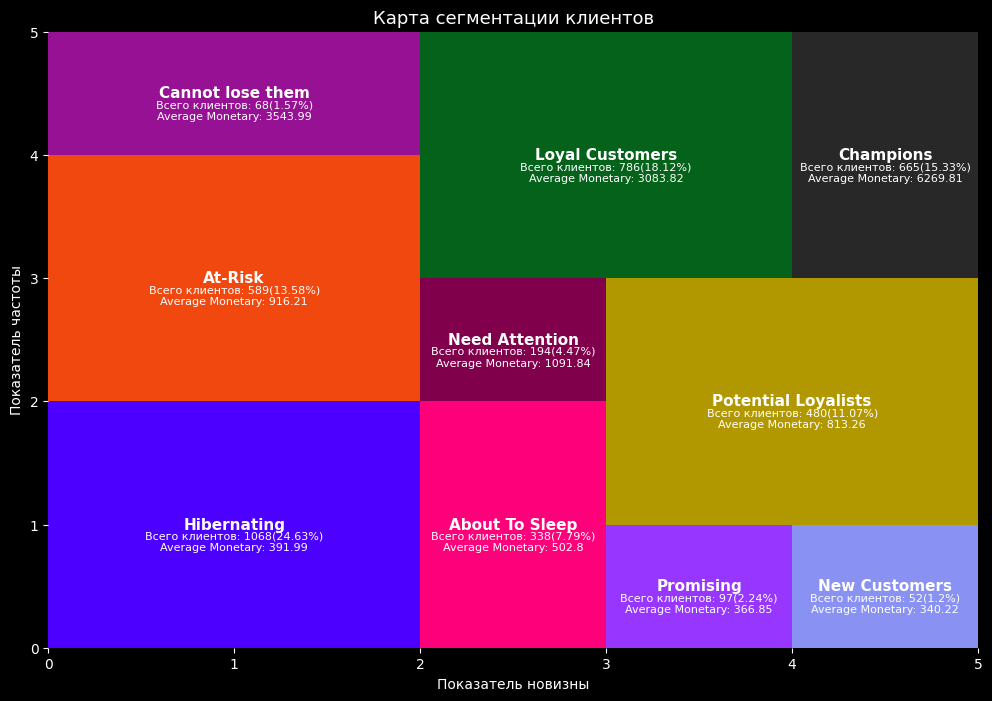

In [103]:
# устанавливаем размер фигуры
fig, ax = plt.subplots(figsize = (12, 8))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

# cоздаем цветовую палитру
plt.rcParams["axes.facecolor"] = "white"
palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF",
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

# строим карты сегментации клиентов
for key, color in zip(rfm_coordinates.keys(), palette[:10]):

    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]

    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)

    users = rfm_tab[rfm_tab.segment == key].shape[0]
    users_percentage = (rfm_tab[rfm_tab.segment == key].shape[0] / rfm_tab.shape[0]) * 100
    avg_monetary = rfm_tab[rfm_tab.segment == key]['monetary'].mean()

    user_txt = '\n\nВсего клиентов: ' + str(users) + '(' +  str(round(users_percentage, 2)) + '%)'
    monetary_txt = '\n\n\n\nAverage Monetary: ' + str(round(avg_monetary, 2))

    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2

    plt.text(x = x, y = y, s = key, ha = 'center', va = 'center', fontsize = 11, color = 'white', fontweight = 'bold')
    plt.text(x = x, y = y, s = user_txt, ha = 'center', va = 'center', fontsize = 8, color = 'white')
    plt.text(x = x, y = y, s = monetary_txt, ha = 'center', va = 'center', fontsize = 8, color = 'white')

# настройка карты
    ax.set_xlabel('Показатель новизны')
    ax.set_ylabel('Показатель частоты')
    ax.set_title('Карта сегментации клиентов', size = 13)
    sns.despine(left = True, bottom = True)

In [104]:
plt.style.use('default')

In [105]:
import matplotlib.pyplot as plt
plt.style.use ('dark_background')

**Количество клиентов в сигментах**

Text(0.5, 1.0, 'Количество клиентов по сегментам')

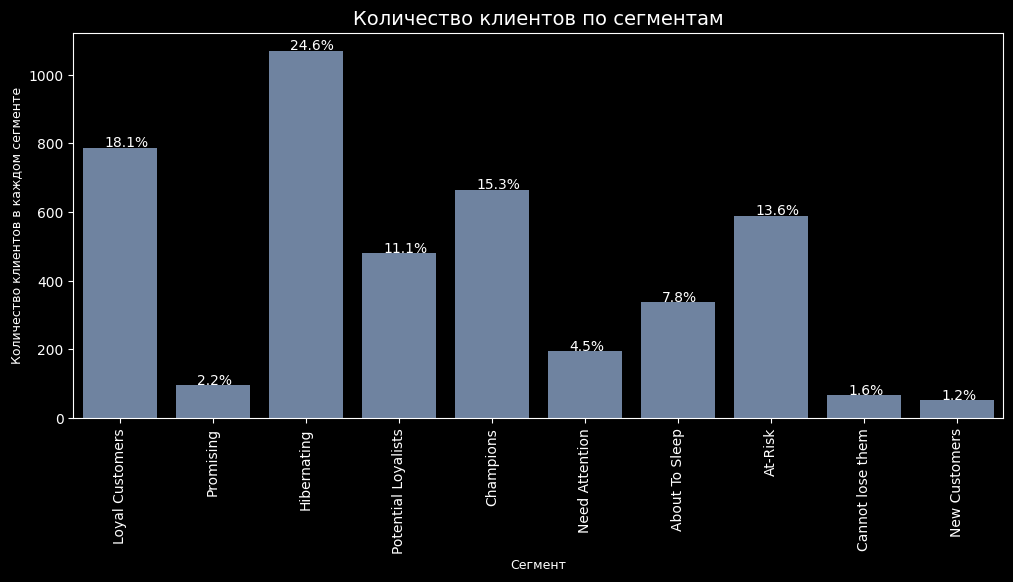

In [106]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# строим countplot
ax = sns.countplot(data = rfm_tab, x = 'segment', color = '#6781a8')

# возвращает количество элементов в списке
total = len(rfm_tab.segment)

# создаем цикл и рассчитываем для каждогой колонки % количество клиентов
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 10)

# настройка графика
plt.xlabel('Сегмент', size = 9)
plt.xticks(rotation = 90)
plt.ylabel('Количество клиентов в каждом сегменте', size = 9)
plt.title('Количество клиентов по сегментам', size = 14)

Рекомендации:
-  Большая часть **24.6%** покупателей находится в категории `Спящий режим`, скорей всего мы их потеряли, так как последняя покупка была давно, и количество заказов было небольшим. Они неактивны.
  - Для возрождения их интереса, направить нужную информацию.
- Сегменты покупателей `Постоянные клиенты` и `Чемпионы` в совокупности дают нам **33.4%**.
 - `Постоянные клиенты`. С ними важно поддерживать персонализированное общение. Избегать массовых рассылок и предлагайте им ограниченное количество продуктов, которые могут их заинтересовать. Также не забывайте просить их оставлять отзывы о продуктах.
 - `Чемпионы`. Этим клиентам стоит предлагать специальные предложения, продукты и скидки, чтобы они чувствовали себя ценными. Постоянно просите их оставлять отзывы и избегайте отправки большого количества предложений. Персонализированное общение и награды также будут важными элементами взаимодействия с ними.
- Покупатели `В зоне риска` составляют **13.6%** те клиенты, которые рискуют стать неактивными. Раньше покупали, но частота снизилась.
 - Отправлять им персонализированные сообщения и другие предложения для повторного подключения. Предлагать им выгодные предложения, чтобы стимулировать их активность.
- `Потенциальные лоялисты` **11.1%** совершали покупки в прошлом и демонстрируют потенциал лояльности.
 - Для этих клиентов предложить программу лояльности, чтобы поддерживать их вовлеченность. Персонализированные рекомендации по продуктам также могут быть полезными.
- `Собираются спать` **7.8%**.
 - Сделать все возможное, чтобы они чувствовали себя уверенными в компании. Предложите им выгодные предложения на их любимые товары.
- `Требует внимания` **4.5%** они не являются частыми покупателями.
 - Организовать для них рекламную кампанию в течение ограниченного времени. Предлагать рекомендации по продуктам на основе их поведения и показать им важность покупок.
- `Многообещающие клиенты` **2.2%** совершившие несколько покупок.
 - Эти клиенты уже проявили интерес к вашему бренду и у них есть потенциал стать постоянными клиентами. Предложить им программу лояльности или скидки на следующую покупку, чтобы стимулировать их вовлеченность. Персонализированное общение, например, рекомендации продуктов, основанные на их предыдущих покупках или интересах, также может помочь укрепить их отношение с компанией.
- `Новые клиенты` **1.2%**
 - Для новых клиентов важно создать положительное первое впечатление. Предложите им приветственные скидки или специальные предложения, чтобы стимулировать их первую покупку. Также можно предложить им подписаться на вашу рассылку или социальные сети, чтобы они могли быть в курсе новостей и акций. Персонализированные рекомендации продуктов, основанные на их интересах или поведении на сайте, также могут быть полезными.
- `Их невозможно потерять` **1.6%** клиенты которые часто покупали, но давно не возвращались.
 - Отправляйте им стандартные сообщения с предложениями, предлагать актуальные продукты и выгодные предложения. Спросите их, были ли у них проблемы с их последними покупками, чтобы улучшить их опыт взаимодействия с компанией.

Посмотрим на результаты с помощью визуализации актуальности, частоты и денежной стоимости сегмента.

**Monetary**

Text(0, 0.5, 'monetary')

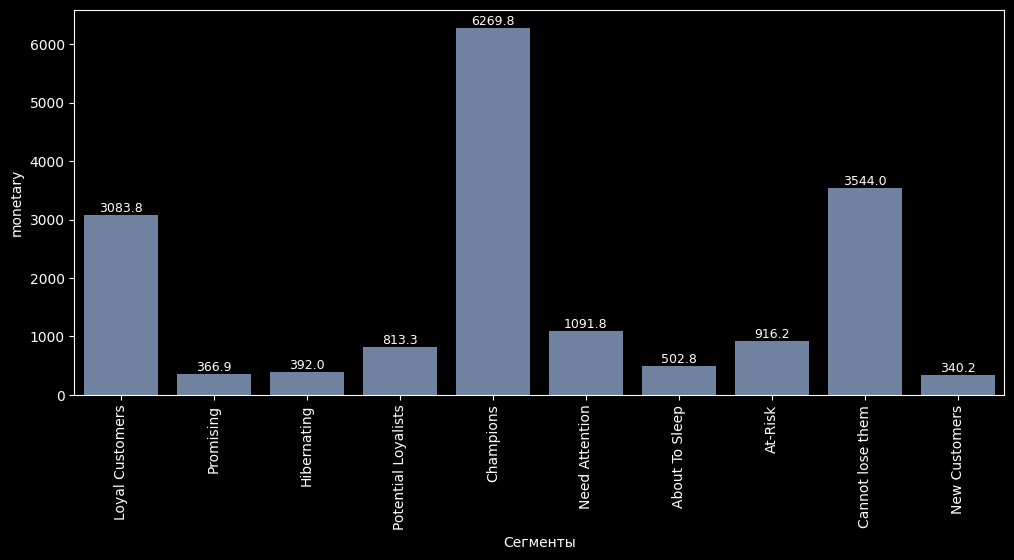

In [107]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# строим barplot
ax = sns.barplot(data = rfm_tab, x = 'segment', y = 'monetary', color = '#6781a8', errorbar = None)

# добавляем значения на каждый столбец
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:1.1f}'.format(p.get_height()),
                                                      ha = 'center', va = 'bottom', size = 9)

# настройка графика
plt.xlabel('Сегменты')
plt.xticks(rotation = 90)
plt.ylabel('monetary')

Посмотрим через таблицу

In [108]:
rfm_tab_monetary = rfm_tab.reset_index()

rfm_monetary_size = rfm_tab_monetary .groupby('segment').agg({'monetary': 'mean', 'cust_id': 'nunique'})

rfm_monetary_size.rename(columns = {'monetary': 'mean_monetary', 'cust_id': 'customer_count'}, inplace = True)

rfm_monetary_size = rfm_monetary_size.sort_values('mean_monetary', ascending = False)

In [109]:
rfm_monetary_size

,mean_monetary,customer_count
segment,,
Champions,6269.805143,665
Cannot lose them,3543.993088,68
Loyal Customers,3083.819173,786
Need Attention,1091.836706,194
At-Risk,916.208475,589
Potential Loyalists,813.261708,480
About To Sleep,502.797429,338
Hibernating,391.986114,1068
Promising,366.851753,97


**Frequency**

Text(0, 0.5, 'frequency')

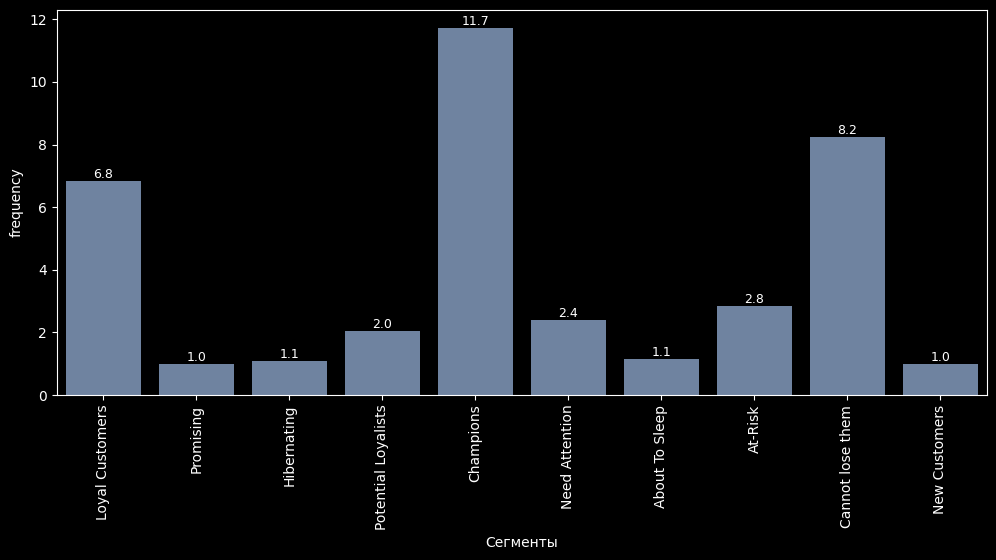

In [110]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# строим barplot
ax = sns.barplot(data = rfm_tab, x = 'segment', y = 'frequency', color = '#6781a8', errorbar = None)

# добавляем значения на каждый столбец
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:1.1f}'.format(p.get_height()),
                                                      ha = 'center', va = 'bottom', size = 9)

# настройка графика
plt.xlabel('Сегменты')
plt.xticks(rotation = 90)
plt.ylabel('frequency')

Делаем выводы по графику:
- **11.7** общее количество транзакций приходится на сегмент **`Чемпионы`**
- **8.2** на втором месте стоит сегмент **`Их невозможно потерять`** что в принципе логично, так как много делали транзакций.
- **6.8** **`Постоянные клиенты`** так же часто выполняют транзакции.  

**Recency**

Text(0, 0.5, 'recency')

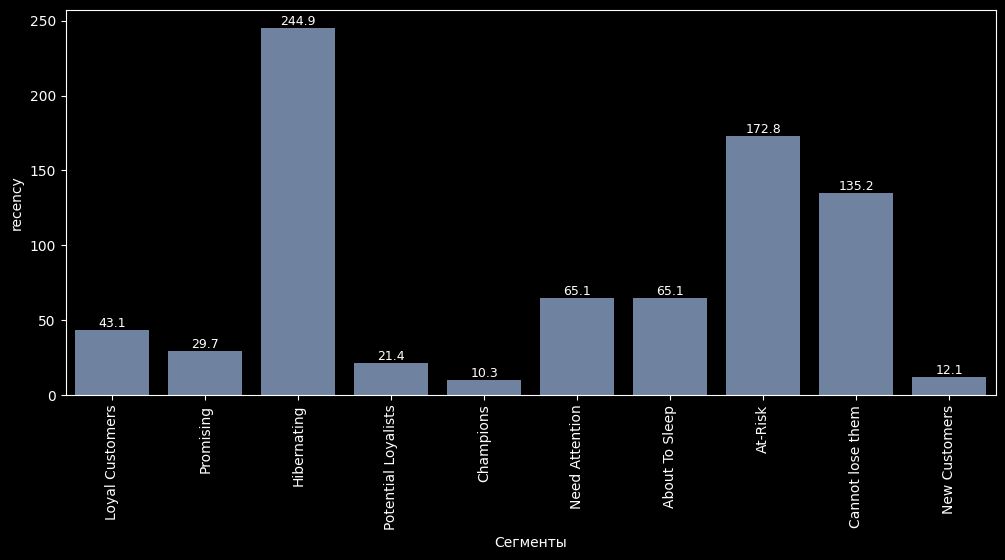

In [111]:
# устанавливаем размер фигуры
plt.figure(figsize = (12, 5))

# строим barplot
ax = sns.barplot(data = rfm_tab, x = 'segment', y = 'recency', color = '#6781a8', errorbar = None)

# добавляем значения на каждый столбец
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:1.1f}'.format(p.get_height()),
                                                      ha = 'center', va = 'bottom', size = 9)

# настройка графика
plt.xlabel('Сегменты')
plt.xticks(rotation = 90)
plt.ylabel('recency')

Создадим таблицу, посмотрим на среднее значение и количество групп: **recency**, **frequency**, **monetary**.

In [112]:
rfm_tab.groupby('segment').agg({'recency' : ['mean', 'count'], 'frequency' : ['mean', 'count'],
                                                                'monetary' : ['mean', 'count']})

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
About To Sleep        65.106509   338   1.147929   338   502.797429   338
At-Risk              172.760611   589   2.831919   589   916.208475   589
Cannot lose them     135.205882    68   8.235294    68  3543.993088    68
Champions             10.272180   665  11.712782   665  6269.805143   665
Hibernating          244.916667  1068   1.098315  1068   391.986114  1068
Loyal Customers       43.099237   786   6.820611   786  3083.819173   786
Need Attention        65.051546   194   2.391753   194  1091.836706   194
New Customers         12.134615    52   1.000000    52   340.224615    52
Potential Loyalists   21.447917   480   2.029167   480   813.261708   480
Promising             29.701031    97   1.000000    97   366.851753    97

Построим круговую диаграмму по общей выручка компании.

In [113]:
monetary_per_segment = (rfm_tab.groupby('segment')['monetary'].sum() /\
                        rfm_tab.groupby('segment')['monetary'].sum().sum()).sort_values(ascending = False)

Text(0.5, 1.0, 'Общая выручка компании')

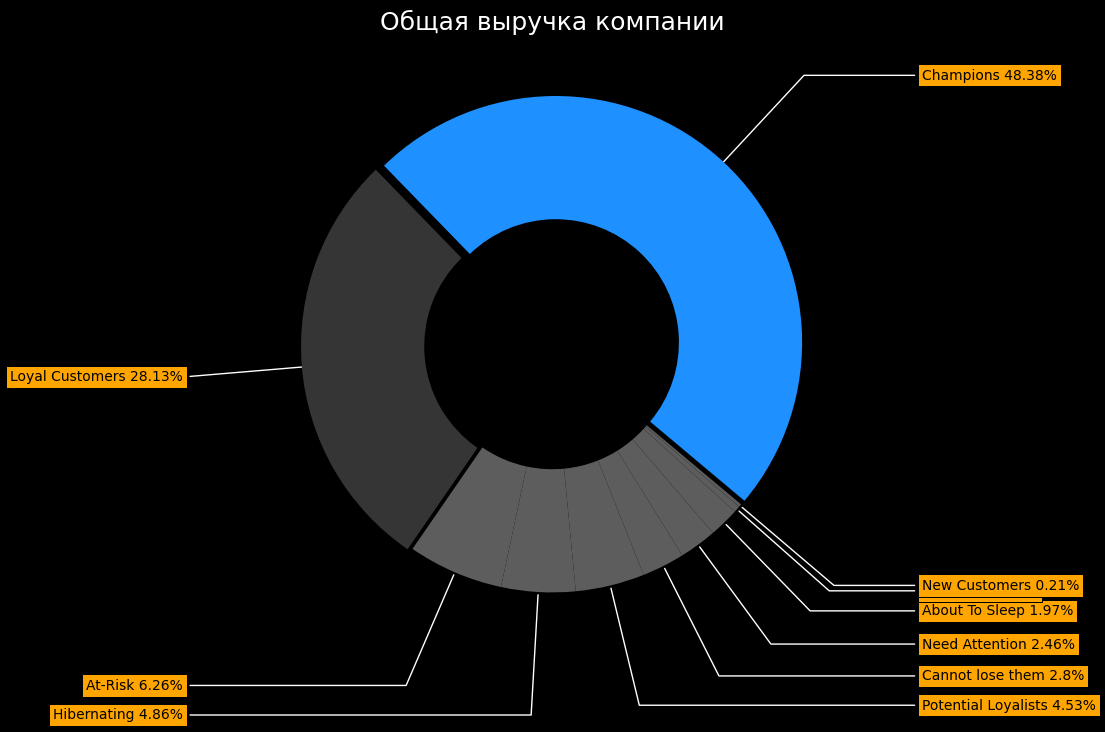

In [113]:
# устанавливаем размер фигуры
fig, ax = plt.subplots(figsize = (8,8))

# cоздаем цветовую палитру
custom_palette = ['#1e90ff', '#353535'] + ['#5d5d5d'] * (len(monetary_per_segment) - 2)
explode = [0.02 if i < 2 else 0 for i in range(len(monetary_per_segment))]

# строим pie
wedges, texts = ax.pie(monetary_per_segment.values, wedgeprops = dict(width = 0.5),
                       startangle = -40, normalize = False, colors = custom_palette, explode = explode)

# настройка выносок и текста в них
bbox_props = dict(boxstyle = 'square,pad=0.3', fc = 'orange', ec = 'k', lw=0.72)
kw = dict(arrowprops = dict(arrowstyle = "-"),
          bbox = bbox_props, zorder = 0, va = 'center', color = 'black')
# расчет
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = 'angle,angleA=0,angleB={}'.format(ang)
    kw['arrowprops'].update({'connectionstyle': connectionstyle})
    ax.annotate(monetary_per_segment.index[i] + ' '  + str(round(monetary_per_segment[i] * 100, 2)) + '%', xy=(x, y),
              xytext=(1.5 * np.sign(x), 1.5 * y), horizontalalignment=horizontalalignment, **kw)

# настройка графика
plt.title('Общая выручка компании', size = 18)

Делаем выводы по круговой диаграмме:
- **48.38%** общей выручки приходится на сегмент **`Чемпионы`**
- **28.13%** общей выручки приходится на сегмент **`Постоянные клиенты`**
- На эти два сегмента приходится **76.51%** общей выручки компании.
